<h1 style="color:#228B22; font-family: Arial, sans-serif; text-align: center;">Projet d'étude : Salifort Motors<br>Analyse de taux de départ des employés</h1>

<h2 style="font-family: Arial, sans-serif;">Ce projet est fondé sur la base de données fictive proposée dans le cadre du programme de <strong>Google Advanced Data Analytics Professional Certificate</strong> que j'ai achevé le 23 mai 2024.</h2>
<p style="font-family: Arial, sans-serif;">Le lien vers le certificat : <a href="https://coursera.org/share/703bf292ebc8f7389a2aee192b635606" style="color:blue;">Certificat</a></p>

<h2 style="font-family: Arial, sans-serif; border-bottom: 2px solid #ddd;">Présentation du projet</h2>
<p style="font-family: Arial, sans-serif; text-align: justify;">Salifort Motors est une entreprise imaginaire. Selon le scénario, le département des ressources humaines a collecté une base de données sur leurs employés. L'entreprise cherche à comprendre les raisons du taux élevé de rotation de personnel afin de distinguer les conditions à améliorer et de construire un modèle de prédiction fiable pour prévenir les démissions non désirées.</p>

<h2 style="font-family: Arial, sans-serif; border-bottom: 2px solid #ddd;">Nos objectifs</h2>
<ol style="font-family: Arial, sans-serif; text-align: justify;">
    <li>Faire une analyse exploratoire des données afin de déterminer les groupes et les causes potentielles du taux de rotation élevé.</li>
    <li>Construire un modèle de classification qui pourrait prédire avec une probabilité significative si un employé démissionnerait de son poste. Ce modèle doit nous permettre de déterminer les facteurs les plus importants qui influencent le taux de rotation du personnel.</li>
</ol>

<h2 style="font-family: Arial, sans-serif; border-bottom: 2px solid #ddd;">Plan</h2>
<ol style="font-family: Arial, sans-serif; text-align: justify;">
    <li>Préparation : téléchargement de la base de données, importations nécessaires.</li>
    <li>Exploration initiale des données et leur nettoyage.</li>
    <li>Exploration ciblée des données afin d'avoir plus d'informations sur les employés qui ont démissionné. Visualisation des dépendances importantes.</li>
    <li>Choix des modèles de classification et construction des modèles de prédiction. Comparaison des résultats et des performances des modèles.</li>
    <li>Analyse des résultats de la modélisation.</li>
</ol>

<h2 style="font-family: Arial, sans-serif; border-bottom: 2px solid #ddd;">La base de données</h2>
<p style="font-family: Arial, sans-serif; text-align: justify;">La base de données est constituée de 15 000 lignes et contient 10 colonnes. Chaque ligne représente un employé qui travaille actuellement ou qui a travaillé à Salifort Motors.</p>
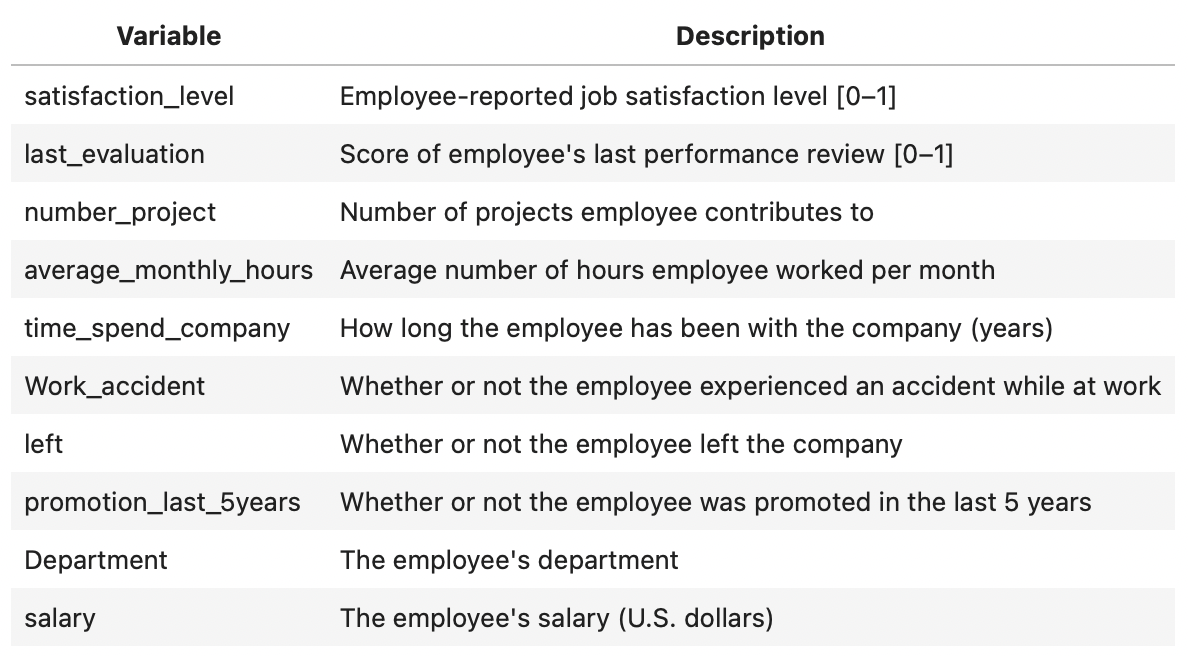

<p style="font-family: Arial, sans-serif; text-align: justify;">La source initiale de cette base de données : <a href="https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv" style="color:blue;">Kaggle - HR Analytics and Job Prediction</a></p>


# Préparation :

In [926]:
# télécharger les bibliothèques utilisées
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression

import sklearn.metrics as metrics
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifierSs
from sklearn.tree import plot_tree

from xgboost import plot_importance
import pickle

In [852]:
# télécharger la base de données
df0 = pd.read_csv("HR_capstone_dataset.csv")
# premières 5 lignes
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

<h1>Exploration initiale :</h1>

In [853]:
# info général sur la base de données
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<p><b>Remarque : </b>Notre variable cible “left” est binaire. La colonne "Work_accident" est également binaire. Les autres variables, sauf deux, “département” et “salaire”, sont quantitatives. </p>

In [854]:
# La statistique descriptive générale :
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

<h3>Nettoyage des données : </h3>

In [855]:
# Standartisons les noms des colonnes.
df0 = df0.rename(columns = {'average_montly_hours': 'average_monthly_hours', 'time_spend_company': 'tenure', 'Work_accident': 'work_accident', 'Department': 'department', 'left': 'turnover'} )
df0.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'tenure',
 'work_accident',
 'turnover',
 'promotion_last_5years',
 'department',
 'salary']

In [856]:
# Vérifier s'il y a des valeurs manquantes :
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
turnover                 0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

<p>Ainsi que c'est un jeu de données synthétiques, il n'y a pas beaucoup de nettoyage à faire. Il n'y a pas de valeurs manquantes </p>

In [857]:
# Chercher et supprimer les doublons :
df0.duplicated().sum()

3008

In [858]:
# Inspectons les doublons : 
duplicate_mask = df0.duplicated(keep=False)
duplicates = df0[duplicate_mask]
duplicate_groups = df0.groupby(list(df0.columns)).size().reset_index(name='count')
exact_duplicates = duplicate_groups[duplicate_groups['count'] > 1]
exact_duplicate_rows = df0.merge(exact_duplicates.drop(columns='count'), on=list(df0.columns), how='inner')

exact_duplicate_rows.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.38             0.53               2                    157   
2                0.38             0.53               2                    157   
3                0.80             0.86               5                    262   
4                0.80             0.86               5                    262   

   tenure  work_accident  turnover  promotion_last_5years department  salary  
0       3              0         1                      0      sales     low  
1       3              0         1                      0      sales     low  
2       3              0         1                      0      sales     low  
3       6              0         1                      0      sales  medium  
4       6              0         1                      0      sales  medium

<p>C'est très peu probable pour que toutes les valeurs de deux lignes soient identiques. Supprimons les doublons.  </p>

In [859]:
# Supprimer les doublons 
df1 = df0.drop_duplicates(keep='first')
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  turnover  promotion_last_5years department  salary  
0       3              0         1                      0      sales     low  
1       6              0         1                      0      sales  medium  
2       4              0         1                      0      sales  medium  
3       5              0         1                      0      sales     low  
4       3              0         1                      0      sales     low

Text(0.5, 0, 'Tenure')

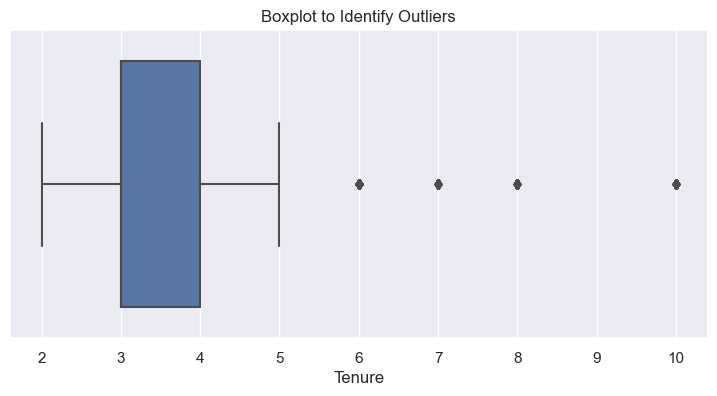

In [860]:
# Un boxplot pour visualiser la distribution de la variable ciblée et détecter les valeurs aberrantes.

plt.figure(figsize=(9, 4))
sns.color_palette("colorblind")
sns.set_theme(style="darkgrid")

box = sns.boxplot(x = df1['tenure'])
g = plt.gca()
plt.title('Boxplot to Identify Outliers')
plt.xlabel('Tenure')

<p>Nous voyons que l’écart-type de la distribution se situe entre 3 et 4 ans. Il y a quelques valeurs aberrantes au-dessus du seuil supérieur. La valeur maximale est de 10 ans. Ces valeurs ne nous semblent pas suspectes; il est fort probable qu’il s’agisse des employés les plus anciens qui occupent peut-être des postes de direction au sein de l’entreprise. Nous vérifierons cette hypothèse ultérieurement.</p>

In [861]:
# Déterminons les seuils inférieur et supérieur de la durée dans l'entreprise. Comptons le nombre des valeurs aberrantes. 

percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

# Calculer l’intervalle interquartile de la 'tenure'
iqr = percentile75 - percentile25

# Déterminons les seuils inférieur et supérieur de la durée dans l'entreprise.
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(f"Seuils inférieur : {lower_limit}")
print(f"Seuils supérieur : {upper_limit}")

# Count how many rows in the data contain outliers in `tenure`
print("Nombre de lignes dans les données contenant des valeurs aberrantes dans 'tenure' : ", len(outliers))

Seuils inférieur : 1.5
Seuils supérieur : 5.5
Nombre de lignes dans les données contenant des valeurs aberrantes dans 'tenure' :  824


<h1>Exploration ciblée :</h1>

In [862]:
# Nombre d'employers qui se sont démissionés
df1['turnover'].value_counts()

0    10000
1     1991
Name: turnover, dtype: int64

In [863]:
# Determinons le pourcentage
total_number = df1.shape[0]
who_stayed, who_left = df1['turnover'].value_counts()

who_left_percent = round((100*who_left) / total_number, 3)
who_stayed_percent = round(100 - who_left_percent, 3)

print(f"{who_left_percent}% left")
print(f"{who_stayed_percent}% stayed")

16.604% left
83.396% stayed


In [864]:
# La valeur moyenne de l'ancienneté
round(df1['tenure'].mean(), 3)

3.365

In [865]:
# la valeur médiane de l'ancienneté
df1['tenure'].median()

3.0

<p>Le groupe ciblé represente 16,6% de la population. Isolons les deux groups pour analyser les différences entre ces deux groups.  </p>

In [866]:
# Le groupe de ceux qui sont parties 
df_left = df1[df1['turnover'] == 1]
df_left = df_left.drop(columns = ['turnover'])
df_left.shape

(1991, 9)

In [867]:
# Le groupe de ceux qui restent
df_stayed = df1[df1['turnover'] == 0]
df_stayed = df_stayed.drop(columns = ['turnover'])
df_stayed.shape

(10000, 9)

In [868]:
stats_left = df_left.describe(exclude=['O'])
stats_left

satisfaction_level  last_evaluation  number_project  \
count         1991.000000      1991.000000     1991.000000   
mean             0.440271         0.721783        3.883476   
std              0.265207         0.197436        1.817139   
min              0.090000         0.450000        2.000000   
25%              0.110000         0.520000        2.000000   
50%              0.410000         0.790000        4.000000   
75%              0.730000         0.910000        6.000000   
max              0.920000         1.000000        7.000000   

       average_monthly_hours       tenure  work_accident  \
count            1991.000000  1991.000000    1991.000000   
mean              208.162230     3.881467       0.052737   
std                61.295145     0.974041       0.223565   
min               126.000000     2.000000       0.000000   
25%               146.000000     3.000000       0.000000   
50%               226.000000     4.000000       0.000000   
75%               262.500000     5.000000       0.000000   
max               310.000000     6.000000       1.000000   

       promotion_last_5years  
count            1991.000000  
mean                0.004018  
std                 0.063277  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [869]:
stats_stayed = df_stayed.describe(exclude=['O'])
stats_stayed

satisfaction_level  last_evaluation  number_project  \
count        10000.000000     10000.000000    10000.000000   
mean             0.667365         0.715667        3.786800   
std              0.217082         0.161919        0.981755   
min              0.120000         0.360000        2.000000   
25%              0.540000         0.580000        3.000000   
50%              0.690000         0.710000        4.000000   
75%              0.840000         0.850000        4.000000   
max              1.000000         1.000000        6.000000   

       average_monthly_hours        tenure  work_accident  \
count           10000.000000  10000.000000   10000.000000   
mean              198.942700      3.262000       0.174500   
std                45.665507      1.367239       0.379558   
min                96.000000      2.000000       0.000000   
25%               162.000000      2.000000       0.000000   
50%               198.000000      3.000000       0.000000   
75%               238.000000      4.000000       0.000000   
max               287.000000     10.000000       1.000000   

       promotion_last_5years  
count           10000.000000  
mean                0.019500  
std                 0.138281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [870]:
left_mean = stats_left.loc['mean']
stayed_mean = stats_stayed .loc['mean']

mean_stat = {
    'Left employees': left_mean,
    'Stayed employees': stayed_mean
}

mean_stat_df = pd.DataFrame(mean_stat)
mean_stat_df

Left employees  Stayed employees
satisfaction_level           0.440271          0.667365
last_evaluation              0.721783          0.715667
number_project               3.883476          3.786800
average_monthly_hours      208.162230        198.942700
tenure                       3.881467          3.262000
work_accident                0.052737          0.174500
promotion_last_5years        0.004018          0.019500

<p>Calculons la différence relative entre les employés partis (Left employees) et les employés restés (Stayed employees), normalisée par rapport aux employés restés, exprimée en pourcentage.</p>

In [871]:
# Calculant le ration de difference de la 2e valeur par rapport à la 1e. 
mean_stat_df['ratio_%'] = ((mean_stat_df['Left employees'] - mean_stat_df['Stayed employees']) / mean_stat_df['Stayed employees'])*100
mean_stat_df

Left employees  Stayed employees    ratio_%
satisfaction_level           0.440271          0.667365 -34.028422
last_evaluation              0.721783          0.715667   0.854591
number_project               3.883476          3.786800   2.552964
average_monthly_hours      208.162230        198.942700   4.634264
tenure                       3.881467          3.262000  18.990392
work_accident                0.052737          0.174500 -69.778041
promotion_last_5years        0.004018          0.019500 -79.394455

<p>Ces résultats sont ambigus et exigent une exploration plus approfondie.</p>
<p>Nous observons une corrélation négative forte entre le niveau de satisfaction et le turnover. Cela suggère que la satisfaction est un facteur significatif dans le turnover des employés.</p>
<p>Les employés qui ont quitté ont été promus beaucoup moins souvent au cours des 5 dernières années par rapport à ceux qui restent (environ 79% moins de promotions). Cela suggère qu’un manque de promotion est un facteur important de départ.</p>
<p>Les employés qui restent ont une fréquence des accidents de travail beaucoup plus élevée (environ 70%) que ceux qui quittent. Cela peut indiquer que les accidents de travail sont moins fréquents chez ceux qui partent.</p>
<p>Malgré la force de certaines corrélations négatives, leur valeur explicative est limitée. Le niveau de satisfaction, sans information plus détaillée, ne nous indique pas les raisons exactes de départ. La corrélation négative entre les fréquences moyennes des accidents de travail demande une investigation ultérieure.</p>
<p>La dépendance négative entre la promotion et le turnover, ainsi que l'absence de corrélation entre la note moyenne lors de la dernière évaluation, indiquent que l'absence de promotion pourrait être un facteur important de départ des employés, révélant un problème dans la gestion des ressources humaines de l'entreprise.</p>
<p>Nous allons explorer les autres corrélations plus loins au cours de notre analyse. </p>

<p>Analysons la destributions de deux catégories ciblés dans les valeurs catégoriques. Est-ce qu'il y a une dépendance significative entre le "turnover" et le niveau de salaire, ainsi que nous demandons si dans cerains département de l'entreprise les départs des employés sont significativements plus fréquants que dans les autres.</p>

<p>Visualisons les correlations des variables avec la variable cible 'turnover' avec la carte de challeure</p>

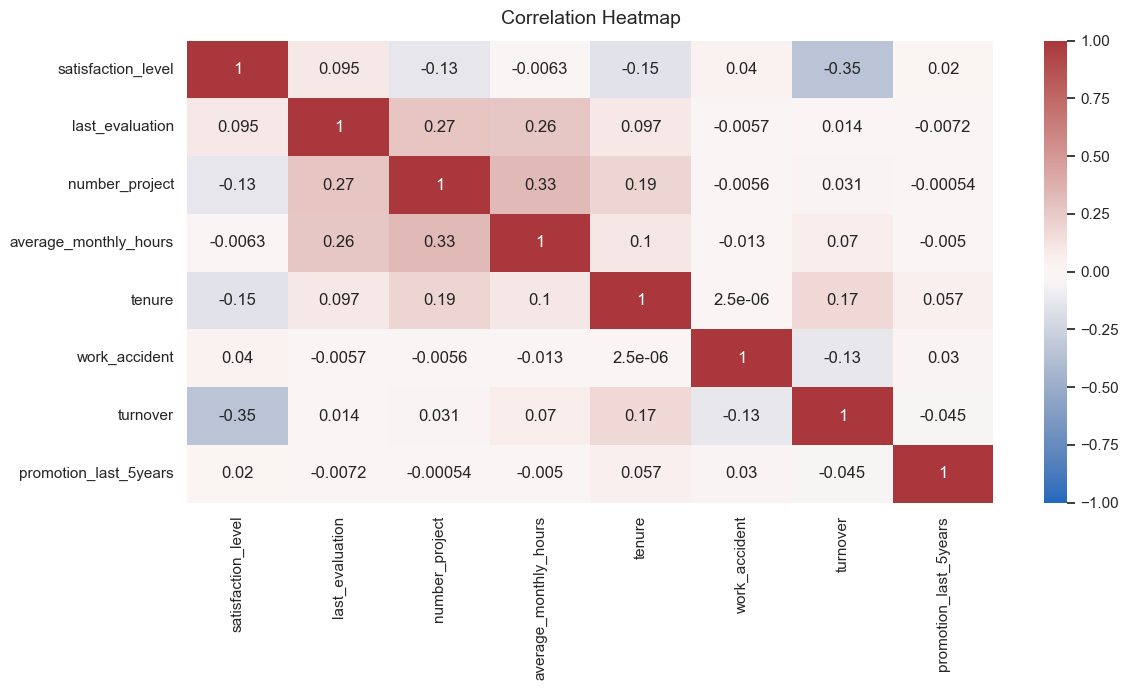

In [872]:
plt.figure(figsize=(13, 6))
heatmap = sns.heatmap(df1.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

<p>La matrice de corrélation confirme que le nombre de projets, les heures mensuelles et les scores d'évaluation sont tous positivement corrélés entre eux. En revanche, le départ d'un employé est négativement corrélé à son niveau de satisfaction.</p>

<h3>Visualisations de données</h3>

<h4>Le nombre d’employés qui ont quitté versus ceux qui sont restés dans chaque département</h4>

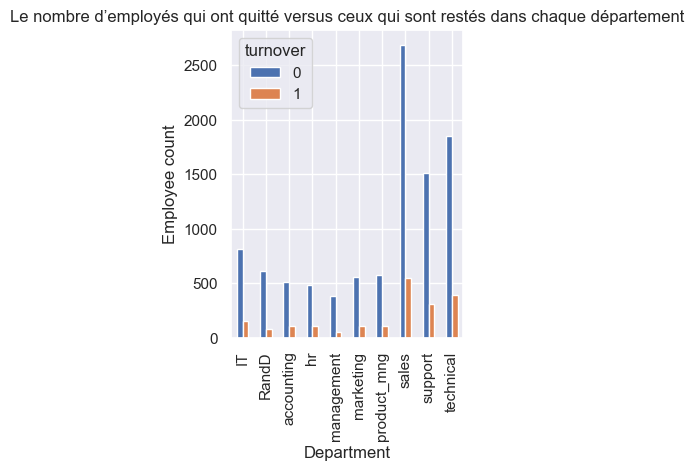

In [873]:
# Le "turnover" et les départements 

pd.crosstab(df1['department'], df1['turnover']).plot(kind ='bar')
plt.title('Le nombre d’employés qui ont quitté versus ceux qui sont restés dans chaque département')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

<p>En se fondant sur les valeurs absolues, il est difficile de conclure si le taux de départ dans certains départements est plus grand que dans les autres vu la différence significative du nombre d'employés dans les département. Calculons le ratio de départ en '%' pour visualiser la différence entre la taux de départ dans chaque département.</p>

In [874]:
# la fonction qui caclule le ratio de départ par rapport au nombre total d'employé par département
def turnover_rate_fun(x):
    number = x['count'].astype(int)
    num_left = x['sum'].astype(int)
    turnover_rate = round((num_left/number)*100, 1)
    return turnover_rate

# créons une table avec les valeurs rélatives au 'turnover'
agg_departement = df1.groupby('department')['turnover'].agg(['sum', 'count'])
agg_departement['turnover_rate_%'] = agg_departement.apply(turnover_rate_fun, axis=1)
agg_departement.reset_index(inplace=True)
agg_departement

department  sum  count  turnover_rate_%
0           IT  158    976             16.2
1        RandD   85    694             12.2
2   accounting  109    621             17.6
3           hr  113    601             18.8
4   management   52    436             11.9
5    marketing  112    673             16.6
6  product_mng  110    686             16.0
7        sales  550   3239             17.0
8      support  312   1821             17.1
9    technical  390   2244             17.4

In [875]:
mean_turnover_departement = agg_departement['turnover_rate_%'].mean()
std_turnover_departement = agg_departement['turnover_rate_%'].std(axis=0)
top_lim = round(mean_turnover_departement + std_turnover_departement, 2)
low_lim = round(mean_turnover_departement - std_turnover_departement, 2)
print(top_lim, low_lim)

18.34 13.82


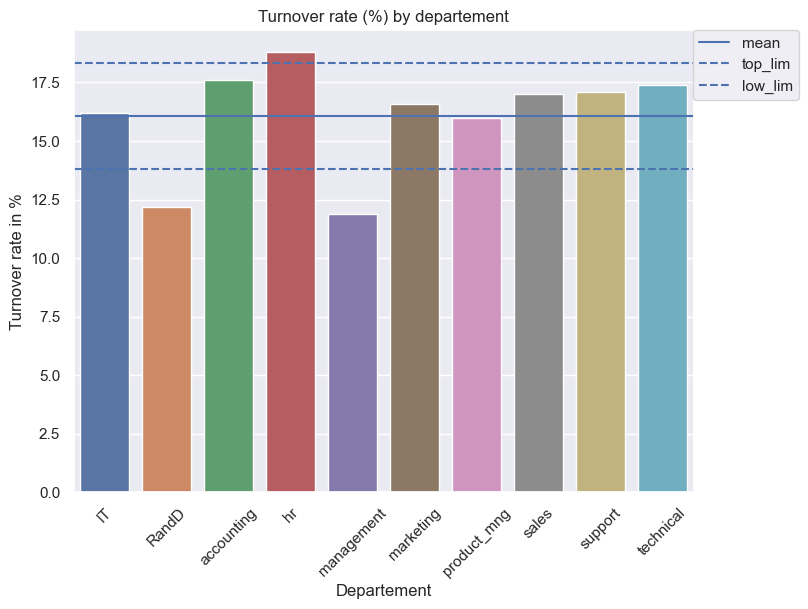

In [876]:
# Visualisons les résultats 
plt.figure(figsize=(8, 6))

sns.barplot(x='department', y='turnover_rate_%', data=agg_departement, errorbar=None)

plt.axhline(y=np.nanmean(agg_departement['turnover_rate_%']), label = 'mean')
plt.axhline(y=top_lim,ls='--', label = 'top_lim')
plt.axhline(y=low_lim,ls='--', label = 'low_lim')
leg = plt.legend(bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0.)

plt.xlabel('Departement')
plt.ylabel('Turnover rate in %')
plt.title('Turnover rate (%) by departement')
plt.xticks(rotation=45)
plt.show()

In [877]:
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  turnover  promotion_last_5years department  salary  
0       3              0         1                      0      sales     low  
1       6              0         1                      0      sales  medium  
2       4              0         1                      0      sales  medium  
3       5              0         1                      0      sales     low  
4       3              0         1                      0      sales     low

<p>Constatons que dans les départemments de l'accounting et des réssources humaines le taux de départ est plus élevé que dans les autres départements.</p>

<h3>La dependance entre le niveau de salaire et le taux de départ.</h3> 

<p>Est-ce que le niveau de salaire se trouve en corrélation avec le départ des employeurs de l'entreprise ? <br>
Préssuposons que la politique salariale disbalancé peut favoriser le départ des employées.  </p>
<p>Investigons également la dépendance entre le niveau de salaire et le charge de travail. Le charge de travail est presebté dans notre 
pase de données par deux variables: le nombre de projets et le nombre d'heures moyen travaillé par l'employé par mois. Nous pouvons préssuposé que le charge augmenté de travail peut être en correlation avec la décision de quitter l'entreprise. </p>
<p>Notons que dans cette base de données le niveau de salaire est representé par une catégorie qualititive 'salary' qui a trois valeurs : bas, moyen et elevé.</p>

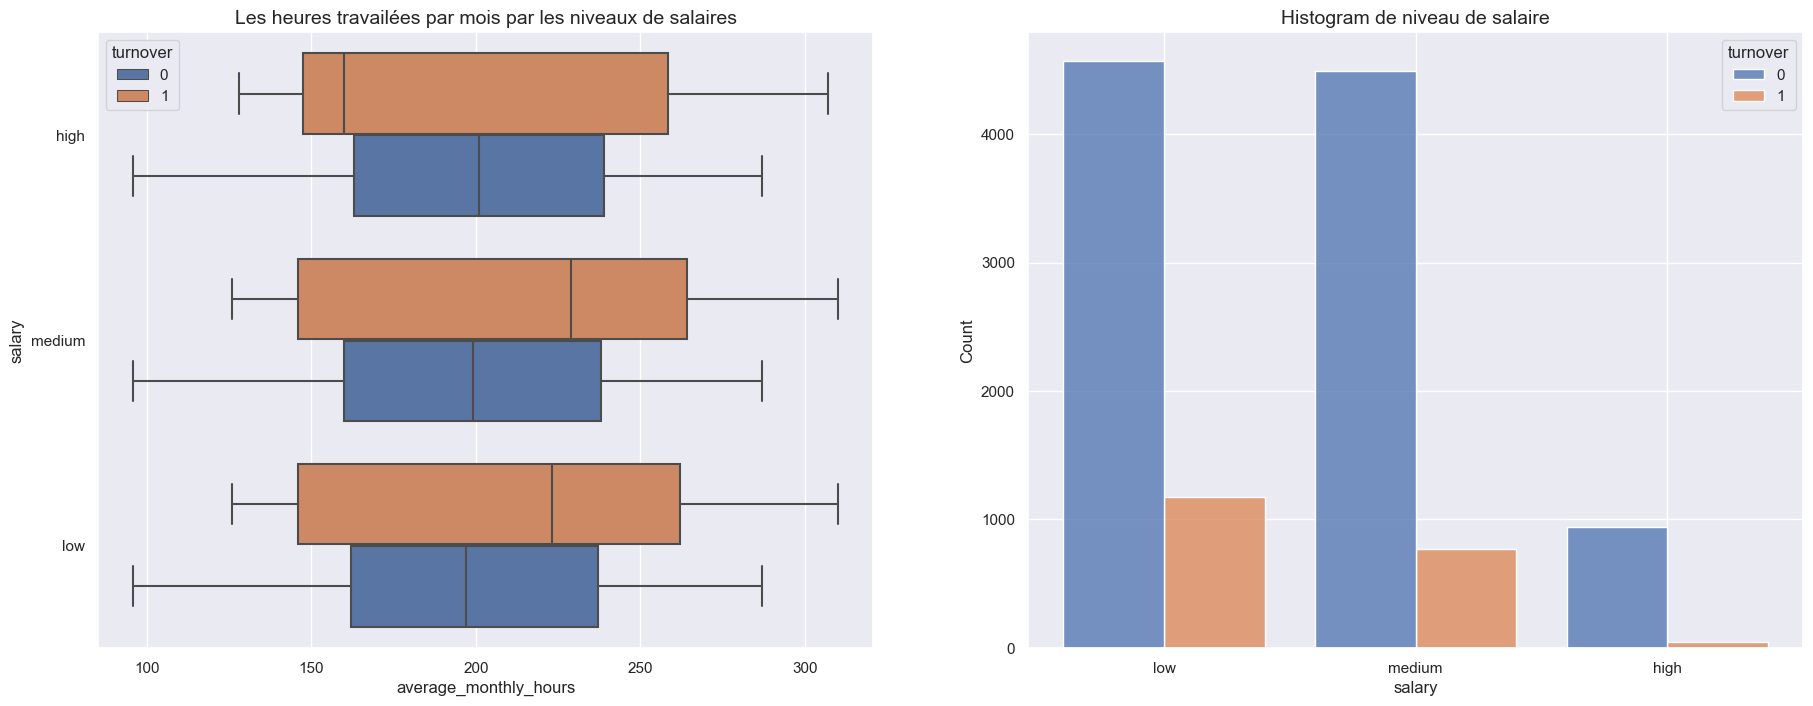

In [878]:
# Visualisons le rapport entre le niveau de salaire et la quantité d'emplyées partis
# Investigons également la dépendance entre le niveau de salaire et le charge de travail. 

fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Créer un boxplot montrant les distributions de salair pour le nombre d'heures travaillés, en comparant les employés 
#qui sont restés versus ceux qui ont quitté

sns.boxplot(data=df1, x='average_monthly_hours', y='salary', hue='turnover', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Les heures travailées par mois par les niveaux de salaires', fontsize='14')

# Créer un histogramme montrant la distribution de niveaux de salaires, en comparant les employés qui sont restés versus ceux qui ont quitté
tenure_stay = df1[df1['turnover']==0]['number_project']
tenure_left = df1[df1['turnover']==1]['number_project']
sns.histplot(data=df1, x='salary', hue='turnover', multiple='dodge', shrink=0.8, ax=ax[1])
ax[1].set_title('Histogram de niveau de salaire', fontsize='14')

# Display the plots
plt.show()

<p>Comme nous voyons sur les graphiques, nous ne pouvons pas détécter des dépendences entre le fait de quitter l'entreprise et le niveau de salaire. </p>

<p>Nous pouvons nous démander à propos du rapport entre l'anciénté et le niveau de salaire. Est-ce que le salaire a une tendance de s'augmenter avec l'ancienté ? Pour répondre à cette question, divisons les employés en deux catégories : ceux qui ont travaillé plus que 6 ans et ceux qui ont travaillé moins que 7 ans.  </p> 

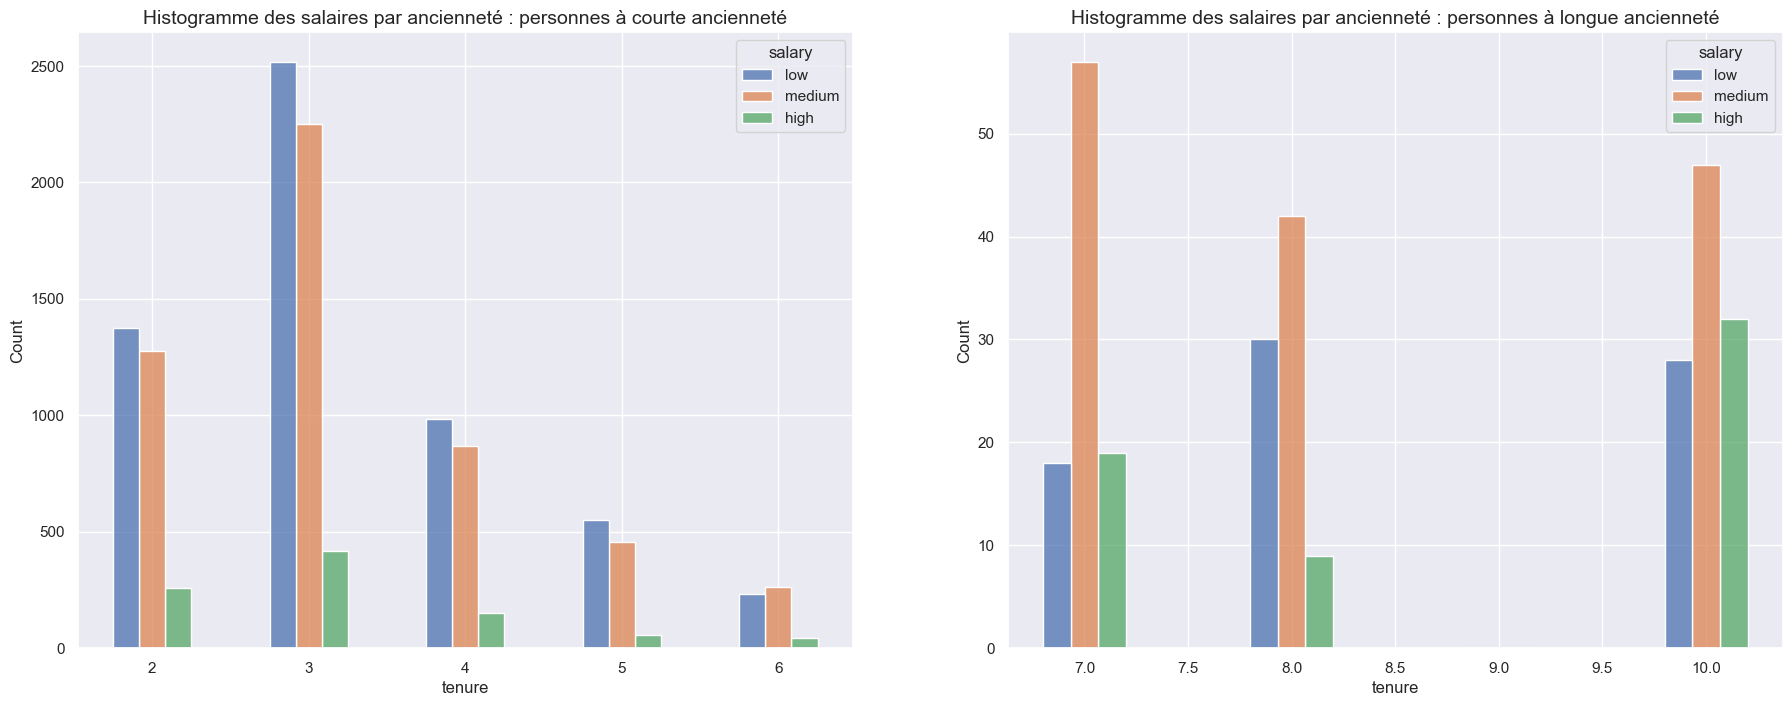

In [879]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Définir les employés à courte ancienneté
tenure_short = df1[df1['tenure'] < 7]

# éfinir les employés à longue ancienneté
tenure_long = df1[df1['tenure'] > 6]

# Histogramme des employés à courte ancienneté
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Histogramme des salaires par ancienneté : personnes à courte ancienneté', fontsize='14')

# Histogramme des employés à longue ancienneté
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Histogramme des salaires par ancienneté : personnes à longue ancienneté', fontsize='14');

<p>Pour ceux qui ont travaillé plus que 7 ans, les salaires moyens sont plus fréquent que parmis les employés qui restaient à l'entreprise moins que quatre ans. Pourtant, nous ne pouvons pas dire qu'il y a un bié très significatif dans le niveau de salaire parmis les travailleurs de la différente ancienneté. </p>

<h3>Le Turn-over de l'entreprise et le charge de travail.</h3>

<p>Investigons d'avantage le rapport entre le fait de quitter et le charge de travail. Construisons un boxplot représentant le nombre d'heures travaillées par le nombre de projet et une histogramme avec la distribution du nombre de projets parmis ceux qui ont quitté l'entreprise et ceux qui ont restés.</p>

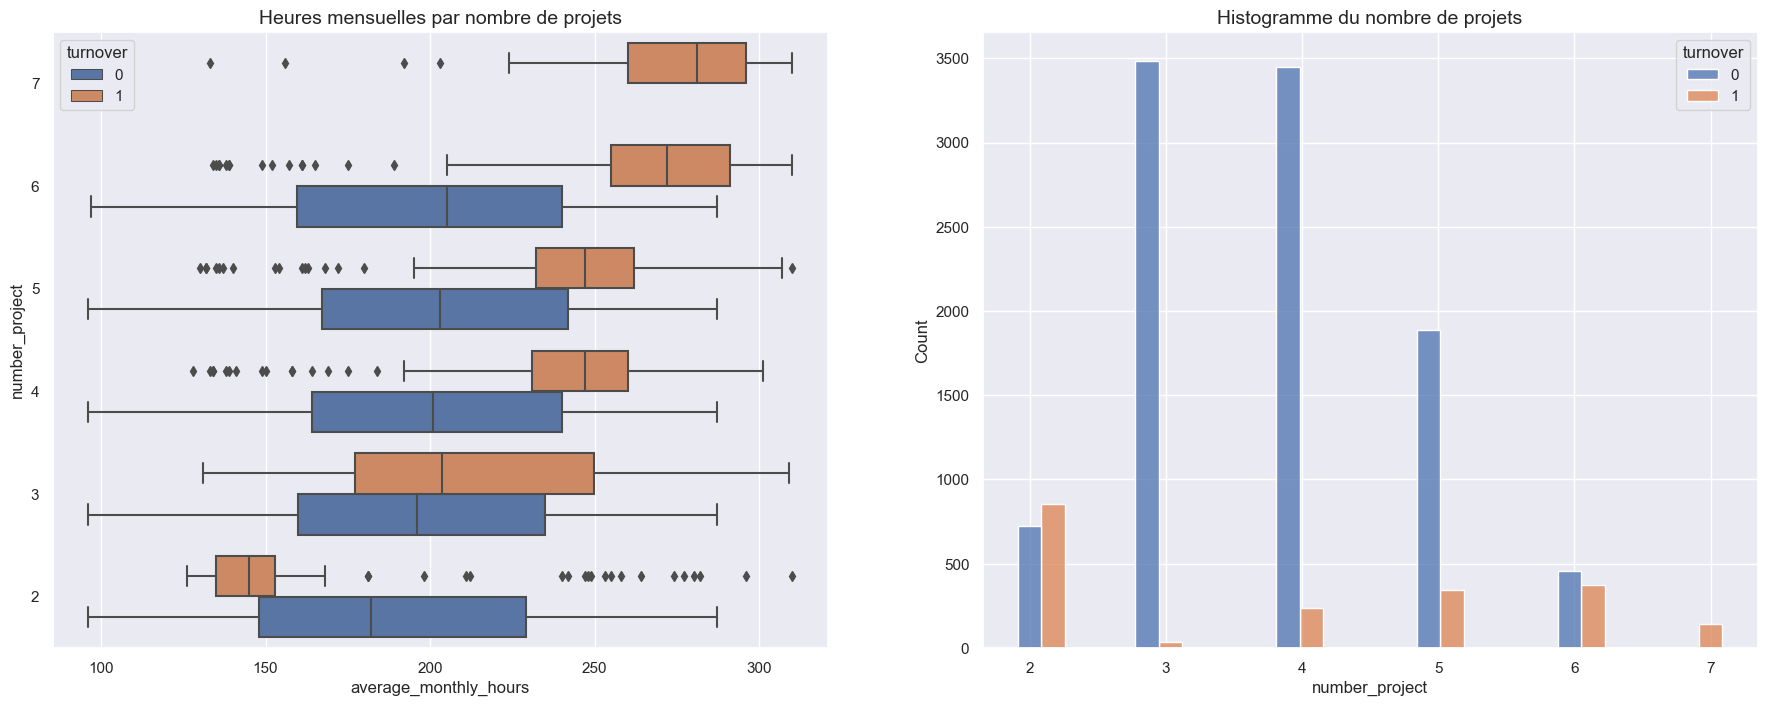

In [880]:
# Investigons également la dépendance entre le niveau de salaire et le charge de travail. 

fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Créer un boxplot montrant les distributions de satisfaction_level par ancienneté, en comparant les employés qui sont restés versus 
# ceux qui ont quitté

sns.boxplot(data=df1, x=df1['average_monthly_hours'], y=df1['number_project'], hue='turnover', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Heures mensuelles par nombre de projets', fontsize='14')

# Créer un histogramme montrant la distribution de tenure, en comparant les employés qui sont restés versus ceux qui ont quitté
tenure_stay = df1[df1['turnover']==0]['number_project']
tenure_left = df1[df1['turnover']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='turnover', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Histogramme du nombre de projets', fontsize='14')

plt.show()

<p>Sur le premier boxplot, nous voyons que le nombre de projets sur lesquels un employeur travaille est bien correlé avec le nombre d'heure travaillé en moyens. On peut conclure que chaque projet ajoute le nombre d'heure travaillé. En même temps, nous voyons qu'il y a une augmentations importance de la proportion de ceux se sont démissionnés de l'entreprise avec l'augmentation de la quantité de projets. 

<p> L'histogramme à droite nous confirme notre conclusion : il y a une augmentation importante de la quantité de départ par rapport à ceux qui restent quand l'employée travaille dans plus que trois projets.</p> 
<p>Calculons le pourcentage d'employées démissionnés par rapport à ceux qui ont resté en dépendance du nombre de projets :</p>

In [881]:
stat_num_projet_stayed = df_stayed['number_project'].value_counts()
stat_num_projet_left = df_left['number_project'].value_counts()

#stat_num_projet_stayed = stat_num_projet_stayed.fillna(0)
num_projet_stat_dic = {
    'Left employees': stat_num_projet_left,
    'Stayed employees': stat_num_projet_stayed
}

num_projet_stat = pd.DataFrame(num_projet_stat_dic)
num_projet_stat.fillna(0, inplace=True)

num_projet_stat.reset_index(inplace=True)
num_projet_stat.rename(columns = {'index': 'number_project'}, inplace=True)
num_projet_stat

number_project  Left employees  Stayed employees
0               2             857             725.0
1               3              38            3482.0
2               4             237            3448.0
3               5             343            1890.0
4               6             371             455.0
5               7             145               0.0

In [882]:
# Calculant le pourcentage de ceux qui sont partis par rapport à ceux qui sont restés :
num_projet_stat['taux de départ_%'] = (num_projet_stat['Left employees']/(num_projet_stat['Left employees']+num_projet_stat['Stayed employees']))*100
num_projet_stat.round(decimals=2)

number_project  Left employees  Stayed employees  taux de départ_%
0               2             857             725.0             54.17
1               3              38            3482.0              1.08
2               4             237            3448.0              6.43
3               5             343            1890.0             15.36
4               6             371             455.0             44.92
5               7             145               0.0            100.00

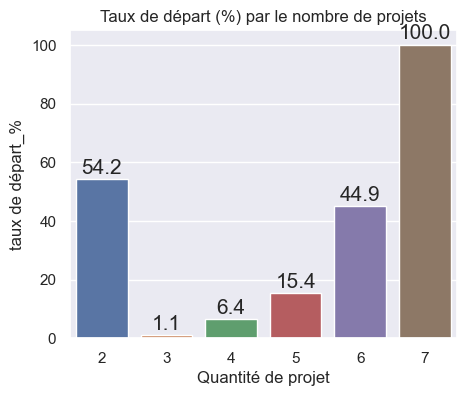

In [883]:
# Visualisons nos résultats 

plt.figure(figsize=(5, 4))

plots = sns.barplot(x='number_project', y='taux de départ_%', data=num_projet_stat, errorbar=None)

for bar in plots.patches:
  
    plots.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('Quantité de projet')
plt.ylabel('taux de départ_%')
plt.title('Taux de départ (%) par le nombre de projets')

plt.show()

<p>Ce graphique à barres confirme notre hypothèse à propos de la corrélation entre le nombre de projets sur lesquels l'employé travaille et le fait d'avoir démissionné. Nous voyons une augmentation drastique des employés qui ont quitté l'entreprise dès que le nombre de projets dépasse quatre. Ainsi, il n'y a que 1,1 % des employés qui ont travaillé sur 3 projets qui ont quitté l'entreprise, ce taux augmente à 6,4 % pour 4 projets, à 15,4 % pour 5 projets et ce taux s'envole à 44,9 % si la personne a travaillé sur 6 projets et 100 % des employés ont quitté leur poste après avoir travaillé sur 7 projets.</p>

<p>En même temps, nous voyons que le taux de départ est grand pour ceux qui ont été impliqués dans deux projets. Peut-être s'agit-il de personnes qui ont commencé à travailler et qui n'ont pas passé leur période d'essai ou bien d'employés qui ont été licenciés. Cela peut également être lié à la période de préavis avant le départ : en sachant que l'employé allait quitter l'entreprise, la direction pourrait réduire la quantité de travail.</p>

<p>Dorénavant, nous pouvons conclure que l'entreprise a un problème avec la gestion des ressources humaines : il y a un nombre significatif d'employés qui quittent l'entreprise à cause de la charge de travail. Nous avons également confirmé que l'augmentation du nombre de projets est liée au plus grand nombre d'heures travaillées.</p>

<p>Ainsi, pour approfondir notre investigation, nous pouvons distinguer les employés qui ont quitté leur poste en deux parties : ceux qui ont été surchargés de travail et ceux qui, au contraire, ne travaillaient que sur deux projets. Introduisons une autre catégorie binaire qui pourrait distinguer les employés trop chargés de travail de ceux qui travaillent un nombre normal d'heures par mois. Rappelons que la semaine de travail légale en France est de 35 heures par semaine ou 151,67 heures par mois.</p>


In [884]:
# Déterminant le premier et quatrième quartipes par le nombre de heures travaillé
percentile25_heures_travaillées = df1['average_monthly_hours'].quantile(0.25)
percentile75_heures_travaillées = df1['average_monthly_hours'].quantile(0.75)

# Calculer l’intervalle interquartile de la 'tenure'
iqr = percentile75_heures_travaillées - percentile25_heures_ravaillées

# Déterminons les seuils inférieur et supérieur du nombre de heures ravaillé pour les valeurs abbérantes 
upper_limit_h_tr = percentile75_heures_travaillées + 1.5 * iqr
lower_limit_h_tr = percentile25_heures_travaillées - 1.5 * iqr
print(f'Seuil du premier quartype : {percentile25_heures_travaillées}, Seuil du quatrième quartype : {percentile75_heures_travaillées}')
print(f"Seuil inférieur : {lower_limit_h_tr}")
print(f"Seuil supérieur : {upper_limit_h_tr}")

Seuil du premier quartype : 157.0, Seuil du quatrième quartype : 243.0
Seuil inférieur : 28.0
Seuil supérieur : 372.0


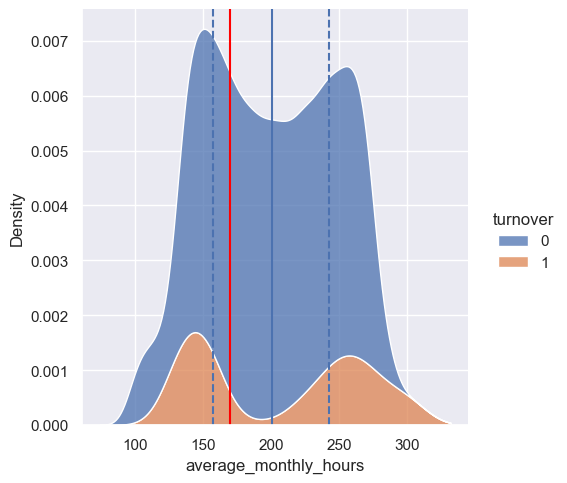

In [1036]:
# Visualisons la destribution du nombre d'heures travaillé entre ceux qui ont quitté et ceux qui ont resté dans l'entreprise.
sns.displot(df1, x="average_monthly_hours", hue="turnover", kind="kde", multiple="stack")
plt.axvline(x=170, label = "heures par mois", color='red')
plt.axvline(x=percentile25_heures_ravaillées,ls='--', label = 'percentile25')
plt.axvline(x=percentile75_heures_ravaillées,ls='--', label = 'percentile75')
plt.axvline(x=df1['average_monthly_hours'].mean(), label = 'percentile75')
sns.set(rc={"figure.figsize":(3, 4)}) 

<p>Ce graphique confirme que la distribution des employés qui ont quitté l'entreprise est biaisée vers le premier et le quatrième écart type. Presque tous les employés qui ont quitté l'entreprise l'ont fait soit en travaillant moins de 200 heures, soit en travaillant plus de 200 heures. Essayons de distinguer ces deux groupes d'employés qui ont quitté l'entreprise.</p>

<p>Une autre observation montre que cette entreprise a un problème de surtravail : nous avons marqué avec la ligne horizontale le nombre d'heures de travail correspondant au temps de travail légal en France. Nous voyons que le temps considéré comme légal est considérablement biaisé à gauche par rapport au nombre d'heures moyen travaillé dans cette entreprise.</p>

<h3>L'ancienté</h3>

<p>Nous avons vu que dans notre base de donnée, l'ancienté est également un facteur important qui se trouve en correlation evant le fait de départ.</p>

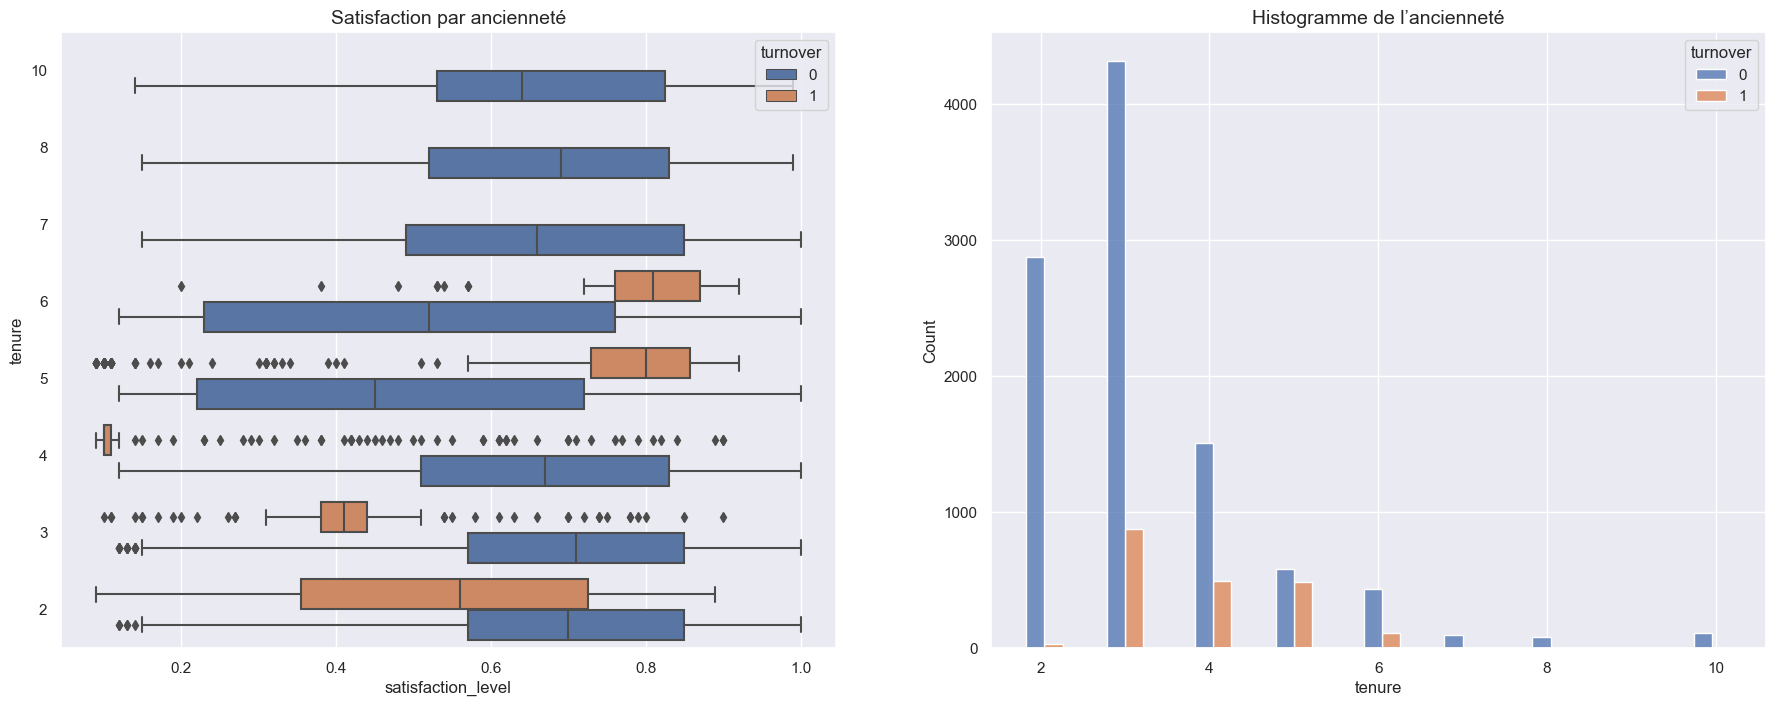

In [1051]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Créer un boxplot montrant les distributions de satisfaction_level par ancienneté, en comparant les employés qui sont restés versus ceux qui ont quitté.
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='turnover', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction par ancienneté', fontsize='14')

# Créer un histogramme montrant la distribution de l’ancienneté, en comparant les employés qui sont restés versus ceux qui ont quitté.
tenure_stay = df1[df1['turnover']==0]['tenure']
tenure_left = df1[df1['turnover']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='turnover', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Histogramme de l’ancienneté', fontsize='14')

plt.show();


<p>Nous voyons que presque toutes les employées qui ont quitté l'entreprise y ont travaillé entre deux et six ans. Nous ne trouvons pas des personnes qui ont quitté leur post avec de l'anciénté de plus de 6 ans.</p>

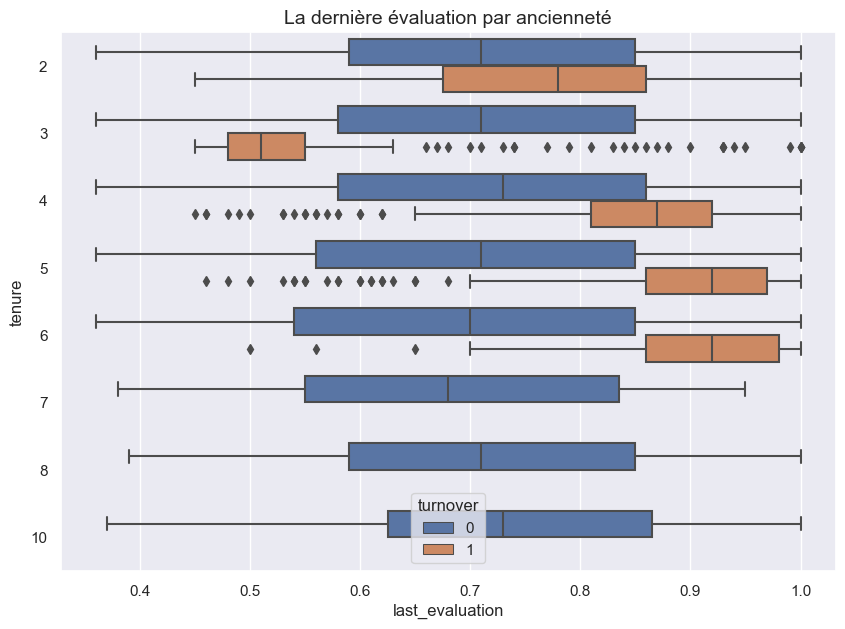

In [1027]:
fig = plt.figure(figsize=(10, 7))
# Créer un boxplot montrant les distributions de satisfaction_level par ancienneté, en comparant les employés qui sont restés versus ceux qui ont quitté.
sns.boxplot(data=df1, x='last_evaluation', y='tenure', hue='turnover', orient="h").set_title('La dernière évaluation par ancienneté', fontsize='14')

plt.show()

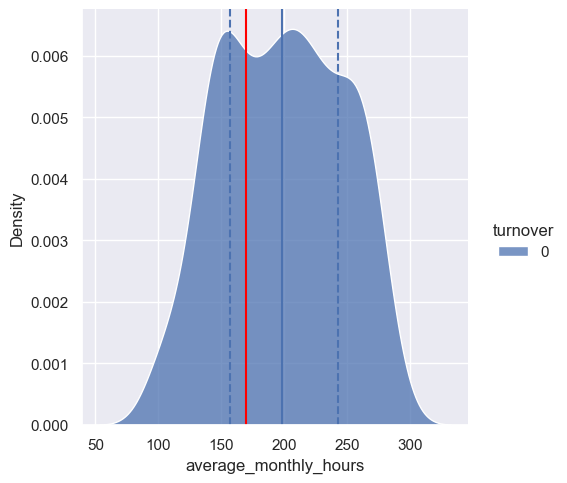

In [1041]:
# Examinons la dépendance entre le charge de travail et l'ancienneté dans l'entreprise
df_ancients = df1[df1['tenure']>=7]
df_new = df1[df1['tenure'] <7]
sns.displot(df_ancients, x="average_monthly_hours", hue="turnover", kind="kde", multiple="stack")
plt.axvline(x=170, label = "heures par mois", color='red')
plt.axvline(x=percentile25_heures_ravaillées,ls='--', label = 'percentile25')
plt.axvline(x=percentile75_heures_ravaillées,ls='--', label = 'percentile75')
plt.axvline(x=df_ancients['average_monthly_hours'].mean(), label = 'percentile75')
sns.set(rc={"figure.figsize":(3, 4)}) 

In [1044]:
work_hours_mean = round(df1['average_monthly_hours'].mean(), 2)
work_hours_mean_anc = round(df_ancients['average_monthly_hours'].mean(), 2)
work_hours_mean_df_new = round(df_new['average_monthly_hours'].mean(), 2)
difference_1 = round(work_hours_mean - work_hours_mean_anc, 2)
difference_2 = round(work_hours_mean_df_new - work_hours_mean_anc, 2)

print(f"La moyenne de nombre d'heure travaillé pour tous les employées de l'entreprise est {work_hours_mean} h/m, les employées avec plus de 6 ans d'ancienneté travaillent {work_hours_mean_anc}. Les employées avec plus de 6 ans d'ancienneté travaillent {difference_1} de plus que la moyenne.")
print(f"{difference_2}")

La moyenne de nombre d'heure travaillé pour tous les employées de l'entreprise est 200.47 h/m, les employées avec plus de 6 ans d'ancienneté travaillent 198.17. Les employées avec plus de 6 ans d'ancienneté travaillent 2.3 de plus que la moyenne.
2.36


In [1047]:
# Examinons la différence entre le nombre de projets entre les deux groups. 
num_proj_anciennes = round(df_ancients['number_project'].mean(), 2)
num_proj_new = round(df_new['number_project'].mean(), 2)
print(f"Projets en moyenne par employée (>6 ans) : {num_proj_anciennes}")
print(f"Projets en moyenne par employée (<7 ans) : {num_proj_new}")


Projets en moyenne par employée (>6 ans) : 3.77
Projets en moyenne par employée (<7 ans) : 3.8


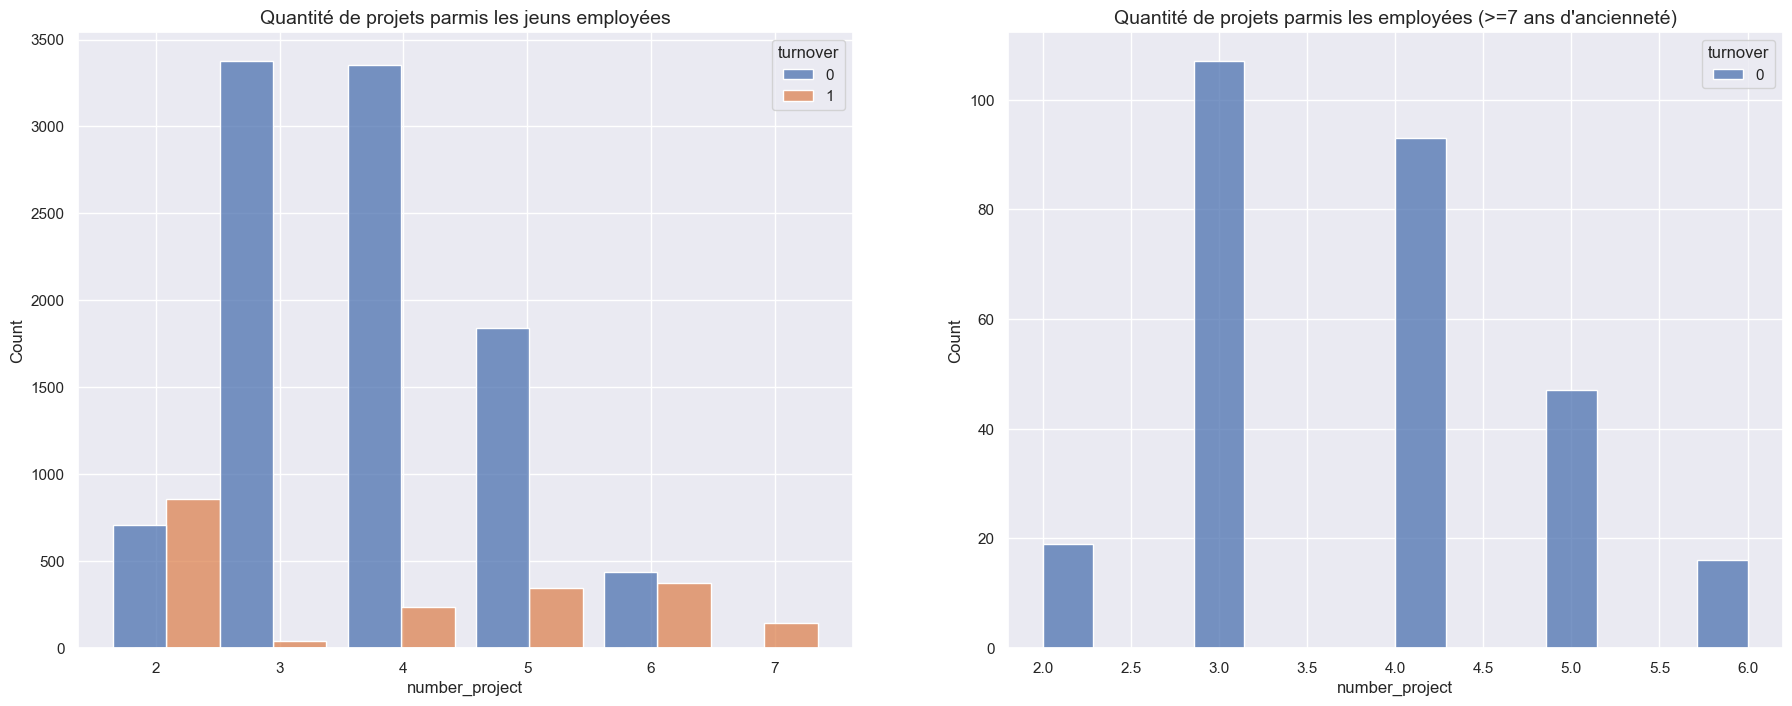

In [1062]:
# Visualisons la distribution de quantité de projets dans deux groups 
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.histplot(data=df_new, x='number_project', hue='turnover', multiple='dodge', shrink=5, ax=ax[0])
#ax[0].invert_yaxis()
ax[0].set_title('Quantité de projets parmis les jeuns employées', fontsize='14')

sns.histplot(data=df_ancients,  x='number_project', hue='turnover', multiple='dodge', ax=ax[1])
ax[1].set_title("Quantité de projets parmis les employées (>=7 ans d'ancienneté)", fontsize='14')

plt.show();

<p>La différence dans le nombre d’heures travaillées entre le groupe d’employés ayant travaillé plus de 6 ans constitue envirant 1 % par rapport au nombre moyen d’heures travaillées, ce qui est une différence insignifiante. Cependant, nous avons remarqué que parmi les employés les plus anciens, aucun n’avait travaillé sur 7 projets en même temps. </p>

In [1030]:
last_evaluation_mean = round(df1['last_evaluation'].mean(), 2)
print(f"La note moyen de la dernière évoluation : {last_evaluation_mean}")


La note moyen de la dernière évoluation : 0.72


<p>Est-ce que les employées qui ont quitté l'entreprise ont avaient les problèmes lors de leur dernière évoluation ? Si, oui, on pourrait lier leur départ avec leur problèmes au travail. Pourtant, cette boîte aux moustaches nous montre que la plupart des empleyés qui ont quitté l'entreprise avaient des notes d'évaluation plus haute que le niveau moyen, à l'exeption les employés qui ont quitté le travail après deux ans d'expérience au seins de l'entreprise. </p>

<h3>Le niveau de satisfaction et la dernière évaluation par le nombre d'heure travaillé en moyenne</h3>

<p>Créeons les deux nuages de points pour representer les correlations entre le niveau de la satisfaction, la dernière évoluation, l'anciènté et en même temps le fait de quitter l'entreprise.   </p>

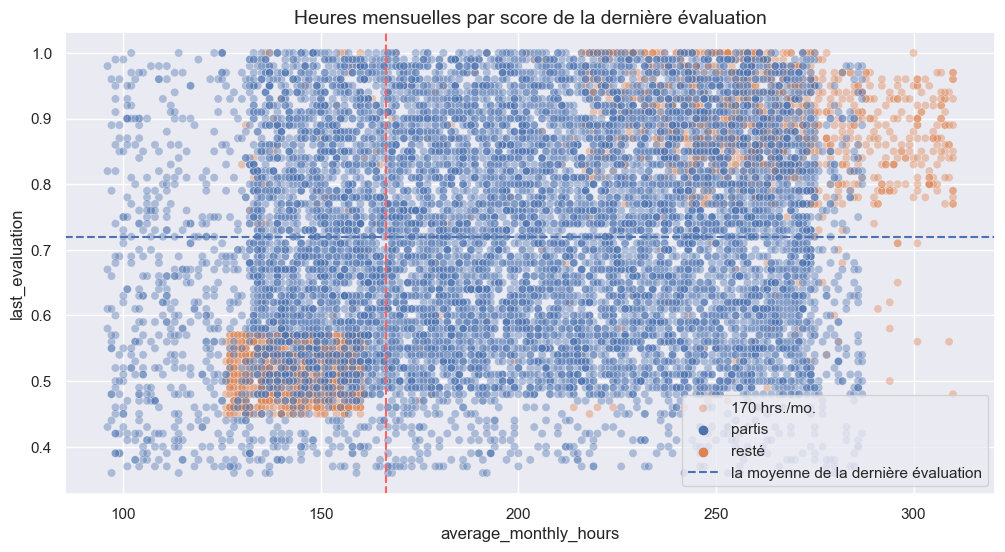

In [889]:
# Créer un nuage de points de average_monthly_hours versus last_evaluation
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x=df1['average_monthly_hours'], y=df1['last_evaluation'], hue='turnover', alpha=0.4)
plt.axhline(y=last_evaluation_mean,ls='--', label = 'la moyenne de la dernière évaluation')
plt.axvline(x=166.6, color='#ff6361', label='166.6 heures/mois.', ls='--')
plt.legend(labels=['170 hrs./mo.', 'partis', 'resté', 'la moyenne de la dernière évaluation'])
plt.title('Heures mensuelles par score de la dernière évaluation', fontsize='14');

<p>Sur ce nuage de points nous voyons les deux groups d’employés ayant quitté l’entreprise que nous avons déja révélé lors de la destribution du nombre d'heures travaillé. Ce graphique nous indique que ce qui ont quitté l'entreprise ayant travaillé mois que la moyenne avait une note plus basse que la moyenne. Par contre, le deuxième group d'employés qui ont quitté l'entreprise ayant travaillé plus que 200 heures par mois avait, d'une manière générale, une note moyenne élévée de la dernière évaluation.</p>

In [890]:
# le niveau moyen de satisfaction
mean_satisfaction = round(df1['satisfaction_level'].mean(), 2)
print(f'Le niveau moyen de satisfaction {mean_satisfaction}')

Le niveau moyen de satisfaction 0.63


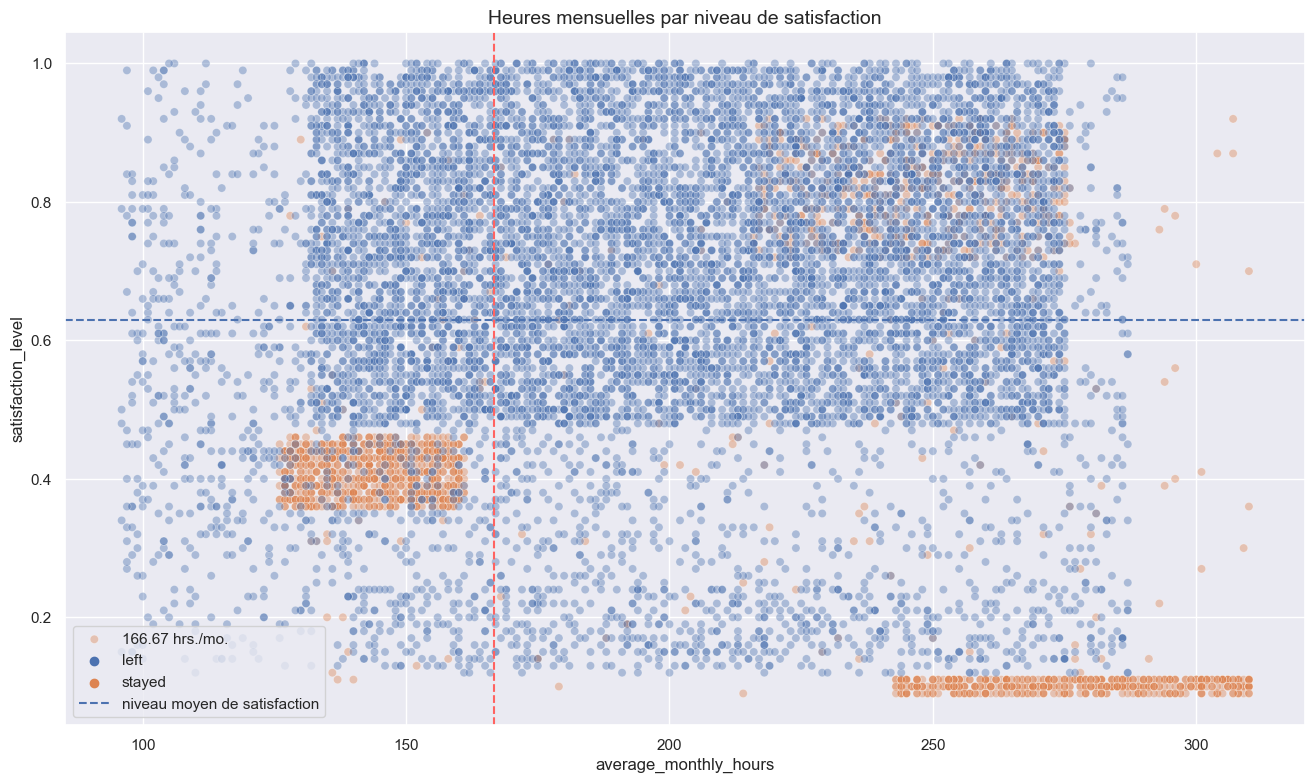

In [891]:
# Nuage de points de average_monthly_hours versus satisfaction_level, en comparant les employés qui sont restés versus ceux qui ont quitté
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='turnover', alpha=0.4)
plt.axhline(y=mean_satisfaction,ls='--', label = 'Le niveau moyen de satisfaction')
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed', 'niveau moyen de satisfaction'])
plt.title('Heures mensuelles par niveau de satisfaction', fontsize='14');

<p>Ici, nous voyons que parmi ceux qui ont quitté l'entreprise et qui ont travaillé moins que la moyenne, le niveau de satisfaction est plus bas que la moyenne.</p>
<p>Dans le groupe de ceux qui ont travaillé plus que la moyenne et qui ont quitté l'entreprise, nous distinguons deux groupes : ceux qui ont travaillé le plus et dont le niveau de satisfaction est très basse, et une partie qui a travaillé en moyenne un peu moins (la partie en haut à droite du graphique), dont le niveau de satisfaction reste assez élevé malgré le fait qu'ils aient quitté l'entreprise et qu'ils aient été surchargés de travail. Cette distinction peut faire l’objet d’une recherche ultérieure. </p>

<h3>Le charge de travail et la promotion</h3>

<p>Invesiguons également si les individus de groupe ciblé (ceux qui ont quitté l'entreprise en travaillant plus que les autres et ayant une bonne note lors de la dernière évaluation) ont réçu une promotion les dernière 5 ans.</p>

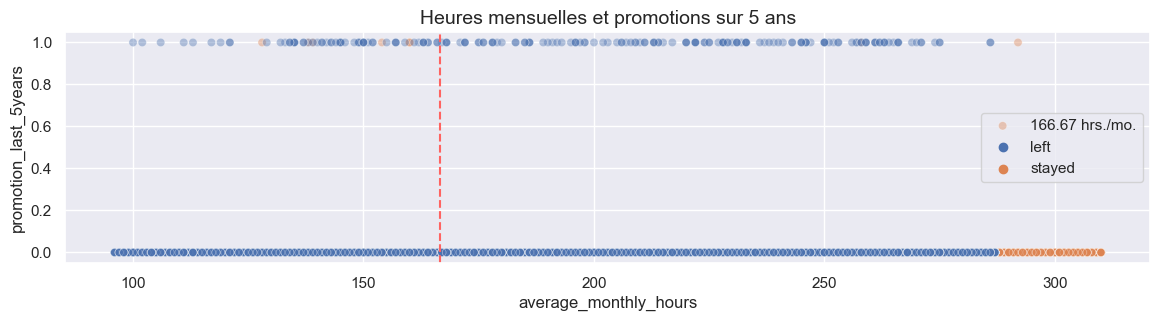

In [892]:
# Graphique pour examiner la relation entre average_monthly_hours et promotion_last_5years
plt.figure(figsize=(14, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='turnover', alpha=0.4)
plt.axvline(x=166.6, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Heures mensuelles et promotions sur 5 ans', fontsize='14');

<p>Nous pouvons faire deux conclusion à partir de ce graphique : </p>
<ol>- très peu d'individus qui ont été promues les dernières 5 ans ont quittés l'entreprise</ol>
<ol>- presque aucun individu du groupe ciblé n'a pas reçu de promotion.</ol>
<p>Nous pouvons préssuposer que l'absence de promotion pourrait devenir une des raison de quitter l'entreprise.</p>

<h2>Modélisation</h2>
<h3>Régression logistique</h3>

<p>La régression logistique est un modèle statistique sensibles aux valeurs aberrantes. Nous avons induqué qu'il y a des valeurs abberantes de l'ancienneté. Il est nécéssaire de les suprimmer. </p>

In [893]:
# Supprimons les valeurs abbérantes 
df_logistic = df1[(df1['tenure'] <= upper_limit) & (df1['tenure'] >= lower_limit)]
df_logistic.reset_index(inplace = True, drop = True)

<h4>Régression logistique : tour I</h4>

In [894]:
# choisissons les variables qui sont fortement corrélés avec la variable ciblée 
df_logistic1 = df_logistic.drop(['last_evaluation', 'number_project', 'average_monthly_hours', 'work_accident', 'promotion_last_5years', 'salary', 'department'], axis=1)


<h3>Construction de modèle</h3>

<h4>Vérification de la Multicolinéarité</h4>

<p>Vérifions l'équilibre de données</p>

In [895]:
df_logistic1['turnover'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: turnover, dtype: float64

<p>L'équilibre est 17% sur 83%. Les données sont pas parfaitement équilibrées, pourtant nous pouvons les utiliser sans rééquilibrage. Ensuite nous pourrions tester la modélisation avec la rééquilibrage</p>

In [896]:
# Ajouter une constante 
X = df_logistic1
X = sm.add_constant(X)

In [897]:
#  Calculer le Variance Inflation Factor (VIF) pour vérifier la multicolinéarité entre les prédicteurs 
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

              Feature        VIF
0               const  25.497369
1  satisfaction_level   1.203890
2              tenure   1.130836
3            turnover   1.280305


<p>Le VIF pour chaque variable se trouve dans la norme : 1 < VIF < 5, que signifie que le niveau de multicolinéarité reste modéré</p>

In [898]:
# Séparer les données en deux parties: 'test' et 'train' 
y = df_logistic1['turnover']
X = df_logistic1.drop('turnover', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

In [899]:
# Construsons modèle :
clf =  LogisticRegression().fit(X_train, y_train)

In [900]:
# imprimons les coefficients 
clf.coef_

array([[-3.83422046,  0.8179052 ]])

In [901]:
clf.intercept_

array([-2.18532477])

In [902]:
y_pred = clf.predict(X_test)

In [903]:
clf.predict_proba(X_test)[::, -1]

array([0.21139386, 0.05534007, 0.03190829, ..., 0.08492626, 0.07374133,
       0.10105924])

<h3>Resultats de la régression logisique </h3>

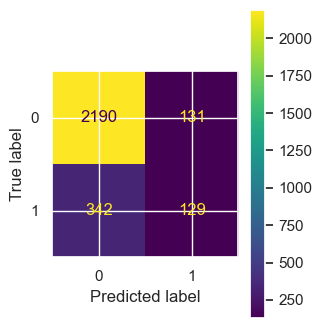

In [904]:
# créer la matrix de confusion pour visualiser les résultats 
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

In [905]:
# rapport de classification
target_names = ['Prédiction : reste', 'Prédiction : part']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

Prédiction : reste       0.86      0.94      0.90      2321
 Prédiction : part       0.50      0.27      0.35       471

          accuracy                           0.83      2792
         macro avg       0.68      0.61      0.63      2792
      weighted avg       0.80      0.83      0.81      2792



<p>Nous voyons que notre modéle prédit bien (Précision : 86%, Recall : 94% et F1-score : 90%) si l'employée reste en entreprise. Pourtant, les résultats ne sont pas très satisfaisantes quand il concérne la prédiction des employées qui partent.  </p>

<h4>Régression logistique : tour II</h4>

<p>Essayons cette fois-ci d'utiliser toutes les variables et de rébalancer les données d'entrainnement</p>

In [942]:
# encoder les donner qualitatifs
df_num = df1.copy()


df_num['salary'] = (
    df_num['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df_num = pd.get_dummies(df_num, drop_first=False)


df_num.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  turnover  promotion_last_5years  salary  \
0       3              0         1                      0       0   
1       6              0         1                      0       1   
2       4              0         1                      0       1   
3       5              0         1                      0       0   
4       3              0         1                      0       0   

   department_IT  department_RandD  department_accounting  department_hr  \
0              0                 0                      0              0   
1              0                 0                      0              0   
2              0                 0                      0              0   
3              0                 0                      0              0   
4              0                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [943]:
# Séparant les données en deux parties
df_log_train, df_log_test = train_test_split(df_num, test_size=0.25, random_state=42)
df_log_train['turnover'].value_counts()

0    7499
1    1494
Name: turnover, dtype: int64

In [944]:
# Rébalançons notre base de donnée en réduisant le nombre des valeures positives de la variable ciblée 'turnover'
df_logistic_maj = df_log_train[df_log_train['turnover'] == 0]
df_logistic_min = df_log_train[df_log_train['turnover'] == 1]

df_log_train_undersampled = df_logistic_maj.sample(n=len(df_logistic_min), replace=True, random_state=42)

# Combine majority classes with upsampled minority classes
df_log_train1 = pd.merge(df_log_train_undersampled, df_logistic_min, how='outer', on=df_log_train.columns.tolist())

df_log_train1['turnover'].value_counts()

0    1494
1    1494
Name: turnover, dtype: int64

In [946]:
# Entrainons le modéle 
y_ = df_log_train1['turnover']
X_ = df_log_train1.drop('turnover', axis=1)

clf_2 =  LogisticRegression().fit(X_, y_)

/Users/sergeishadrin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [910]:
y_test1 = df_log_test['turnover']
X_test1 = df_log_test.drop('turnover', axis=1)

In [911]:
# testons notre modéle 
y_pred1 = clf_2.predict(X_test1)


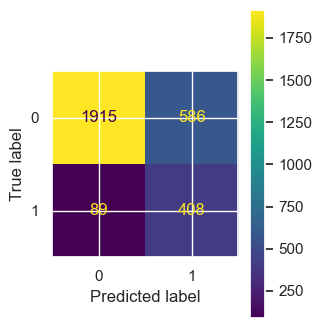

In [912]:
# Visualisons les résultats avec le matrix de confusion
cm1 = metrics.confusion_matrix(y_test1, y_pred1, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = clf.classes_)
disp.plot()

In [913]:
# rapport de classification
target_names = ['Prédiction : reste', 'Prédiction : part']
print(classification_report(y_test1, y_pred1, target_names=target_names))

                    precision    recall  f1-score   support

Prédiction : reste       0.96      0.77      0.85      2501
 Prédiction : part       0.41      0.82      0.55       497

          accuracy                           0.77      2998
         macro avg       0.68      0.79      0.70      2998
      weighted avg       0.87      0.77      0.80      2998



<p>Organisons les résultats de prédiction par rapport aux vrais positifs :</p>

In [914]:
resultats = pd.DataFrame({'Model': ["Régression logistique : I", "Régression logistique : II", ],
                      'F1': [0.35, 0.65],
                      'Recall': [0.27, 0.90],
                      'Precision': [0.50, 0.51],
                      'Accuracy': [0.83, 0.83]
                     }
                    )
resultats

Model    F1  Recall  Precision  Accuracy
0   Régression logistique : I  0.35    0.27       0.50      0.83
1  Régression logistique : II  0.65    0.90       0.51      0.83

<p>Nous voyons que le rébalançement a considérablement augmenté la performance de notre modèle.</p>

<h3>Arbre de décision</h3>

In [1017]:
# Séparons les variables 
y = df_num['turnover']

X = df_num.copy()
X = X.drop('turnover', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [1009]:
%%time
# Construir le modèle 

decision_tree = DecisionTreeClassifier(random_state=0)

# parametres
tree_para = {'max_depth':[4,6,8,9, None],
             'min_samples_leaf': [2,5,3,1],
             'min_samples_split': [2, 4, 6]}

scoring = {'acc': 'accuracy', 'f1_score': 'f1', 'prec': 'precision', 'rec': 'recall', 'roc_auc': 'roc_auc'}
clf = GridSearchCV(decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit='roc_auc')

clf.fit(X_train, y_train)

CPU times: user 6.78 s, sys: 15.5 ms, total: 6.8 s
Wall time: 6.84 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, 9, None],
                         'min_samples_leaf': [2, 5, 3, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'acc': 'accuracy', 'f1_score': 'f1', 'prec': 'precision',
                      'rec': 'recall', 'roc_auc': 'roc_auc'})

In [1010]:
print(clf.best_estimator_)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=0)


In [1011]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9682


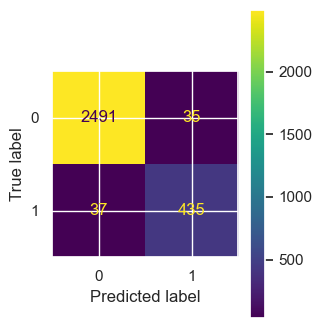

In [1012]:
# testons le modèle sur les données mis à part et imprimons les résultats

dt_pred = clf.predict(X_test)

cm_tree = metrics.confusion_matrix(y_test, dt_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_tree, display_labels = clf.classes_)
disp.plot()

In [1013]:
# Imprimons les résultats :
cv_results = pd.DataFrame(clf.cv_results_) 

best_estimator_results = cv_results.iloc[cv_results['mean_test_f1_score'].idxmax(), :]

f1 = best_estimator_results.mean_test_f1_score
recall = best_estimator_results.mean_test_rec
precision = best_estimator_results.mean_test_prec
accuracy = best_estimator_results.mean_test_acc

print(f'f1: {f1} ')
print(f'recall: {recall}')
print(f'precision: {precision}')
print(f'accuracy: {accuracy}')

f1: 0.939298539832277 
recall: 0.9131166406114295
precision: 0.9676495258364058
accuracy: 0.9800958510506084


In [921]:
# Ajoutons les resultats dans notre 

In [922]:
F1_pred_tree = round(f1_score(y_test, dt_pred), 2)
recall_pred_tree = round(recall_score(y_test, dt_pred), 2)
precision_pred_tree = round(precision_score(y_test, dt_pred), 2)
accuracy_pred_tree = round(accuracy_score(y_test, dt_pred), 2)

new_row = ['Arbre de décision', F1_pred_tree, recall_pred_tree, precision_pred_tree, accuracy_pred_tree]
resultats.loc[len(resultats.index)] = new_row
resultats

Model    F1  Recall  Precision  Accuracy
0   Régression logistique : I  0.35    0.27       0.50      0.83
1  Régression logistique : II  0.65    0.90       0.51      0.83
2           Arbre de décision  0.92    0.92       0.93      0.98

<p>Nous voyons que le modèle d'arbre de décision est plus performant que la regréssion logistique. Pourtant, ce modèle a une tendance pour le suraprentisage. Testons le modèle de fôret aléatoire qui évite ce problème en construisant plusières arbres différents. </p>

<h3>Forêt aléatoire</h3>

In [923]:
%%time
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             }  

scoring = {'acc': 'accuracy', 'f1_score': 'f1', 'prec': 'precision', 'rec': 'recall'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1_score')

rf_cv.fit(X_train, y_train)

CPU times: user 2min 32s, sys: 815 ms, total: 2min 33s
Wall time: 2min 33s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             refit='f1_score',
             scoring={'acc': 'accuracy', 'f1_score': 'f1', 'prec': 'precision',
                      'rec': 'recall'})

In [927]:
# Sauvgarder le modèle réçu :
path = '/Users/sergeishadrin/projects/'

#Pickle the model
with open('rf_cv_model.pickle', 'wb') as to_write:
    pickle.dump(rf_cv, to_write)
    

In [929]:
# Read in pickled model
with open(path + 'rf_cv_model.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

In [931]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [932]:
rf_cv.best_score_

0.9452843012451642

In [934]:
# testons le modèle 
rf_preds = rf_cv.predict(X_test)
accuracy_rf_cv = round(accuracy_score(y_test, rf_preds), 3)
precision_rf_cv = round(precision_score(y_test, rf_preds), 3)
recall_rf_cv = round(recall_score(y_test, rf_preds), 3)
f1_rf_cv = round(f1_score(y_test, rf_preds), 3)

print(f'f1: {f1_rf_cv} ')
print(f'recall: {recall_rf_cv}')
print(f'precision: {precision_rf_cv}')
print(f'accuracy: {accuracy_rf_cv}')

f1: 0.952 
recall: 0.93
precision: 0.976
accuracy: 0.985


In [935]:
# Ajouons les résultats dans notre df
new_row = ['Foret aléatoire', f1_rf_cv, recall_rf_cv, precision_rf_cv, accuracy_rf_cv]
resultats.loc[len(resultats.index)] = new_row
resultats

Model     F1  Recall  Precision  Accuracy
0   Régression logistique : I  0.350    0.27      0.500     0.830
1  Régression logistique : II  0.650    0.90      0.510     0.830
2           Arbre de décision  0.920    0.92      0.930     0.980
3             Foret aléatoire  0.952    0.93      0.976     0.985

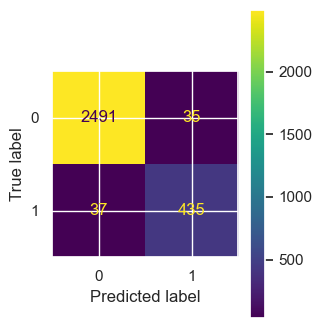

In [941]:
# matrix de confusion
cm_random_forest = metrics.confusion_matrix(y_test, rf_preds, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_tree, display_labels = clf.classes_)
disp.plot()

<p>Ce modèle ce révèle comme la plus performante, elle permet à prédire la plupart des employés qui ont quitté l'enreprise. </p>

<h3>Analyse des résultats de modélisation</h3>

<h3>Régression logistique</h3>

In [994]:
coéfficients_rl = clf_2.coef_
coéfficients_rl = coéfficients_rl.tolist()
coéfficients_rl = coéfficients_rl[0]
variable_names = X_.columns.to_list()

In [983]:
if len(variable_names) != len(coéfficients_rl):
    print("Erreur: Le nombre de variables et le nombre de coefficients ne correspondent pas.")
else:
    # Create DataFrame
    coef_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': coéfficients_rl})
    # Calculate Odds Ratios
    coef_df['Odds Ratio'] = np.exp(coef_df['Coefficient'])
    # Display DataFrame
    print(coef_df)

                  Variable  Coefficient  Odds Ratio
0       satisfaction_level    -4.481499    0.011316
1          last_evaluation     1.145876    3.145196
2           number_project    -0.453549    0.635369
3    average_monthly_hours     0.005939    1.005957
4                   tenure     0.628880    1.875508
5            work_accident    -1.333849    0.263461
6    promotion_last_5years    -1.436854    0.237674
7                   salary    -0.757352    0.468907
8            department_IT    -0.135680    0.873122
9         department_RandD    -0.143776    0.866082
10   department_accounting    -0.053715    0.947702
11           department_hr     0.142271    1.152889
12   department_management    -0.188948    0.827830
13    department_marketing     0.230441    1.259155
14  department_product_mng     0.268031    1.307387
15        department_sales     0.030142    1.030601
16      department_support     0.092084    1.096457
17    department_technical     0.133120    1.142387


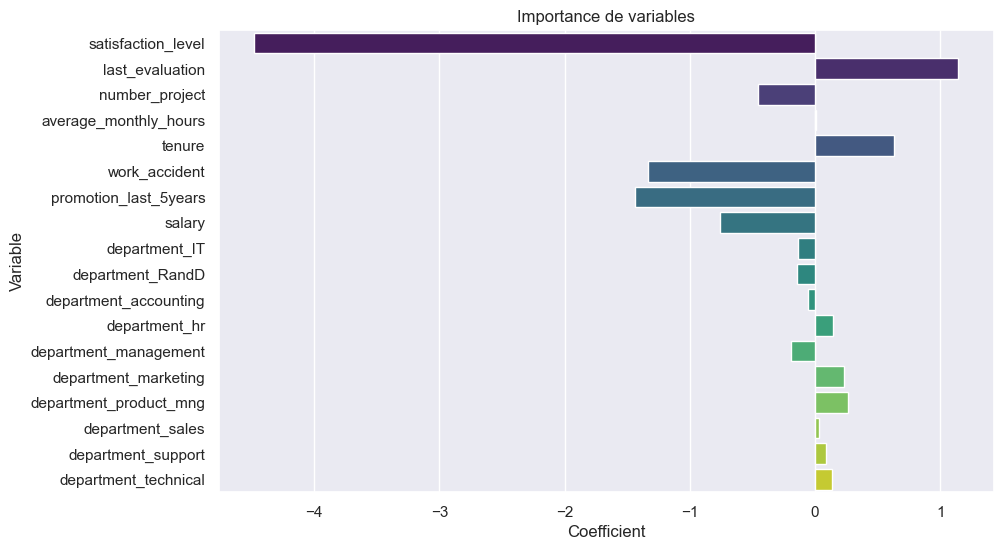

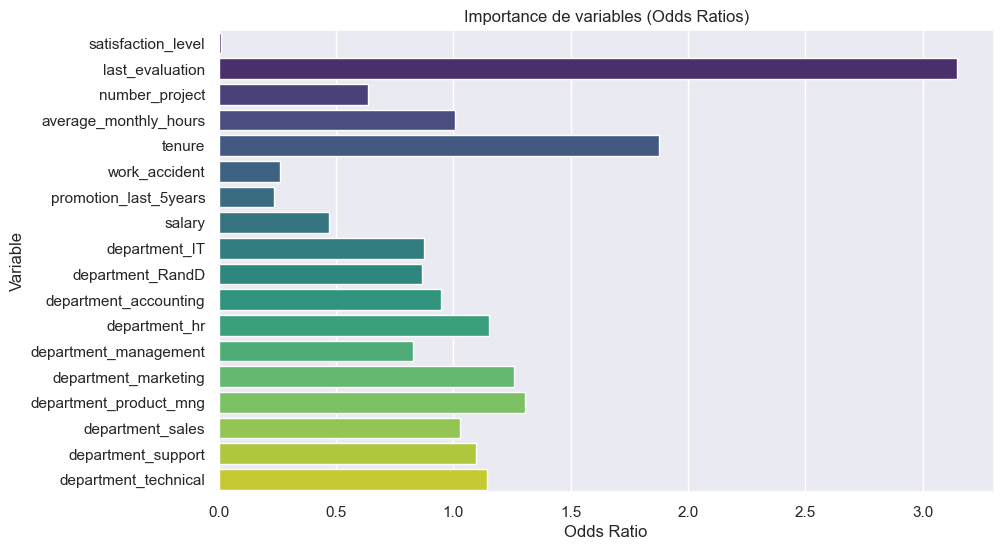

In [986]:
# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coef_df, palette='viridis')
plt.title('Importance de variables')
plt.show()

# Plot odds ratios
plt.figure(figsize=(10, 6))
sns.barplot(x='Odds Ratio', y='Variable', data=coef_df, palette='viridis')
plt.title('Importance de variables (Odds Ratios)')
plt.show()

<p>Les charachteristiques les plus importants avec les coéficients les plus grands sont 'last_evaluation', 'tenure', 'average_monthly_hours' and 'number_project'</p>

<p></p>

<h3>Importance des variables dans l'arbre de décision</h3>

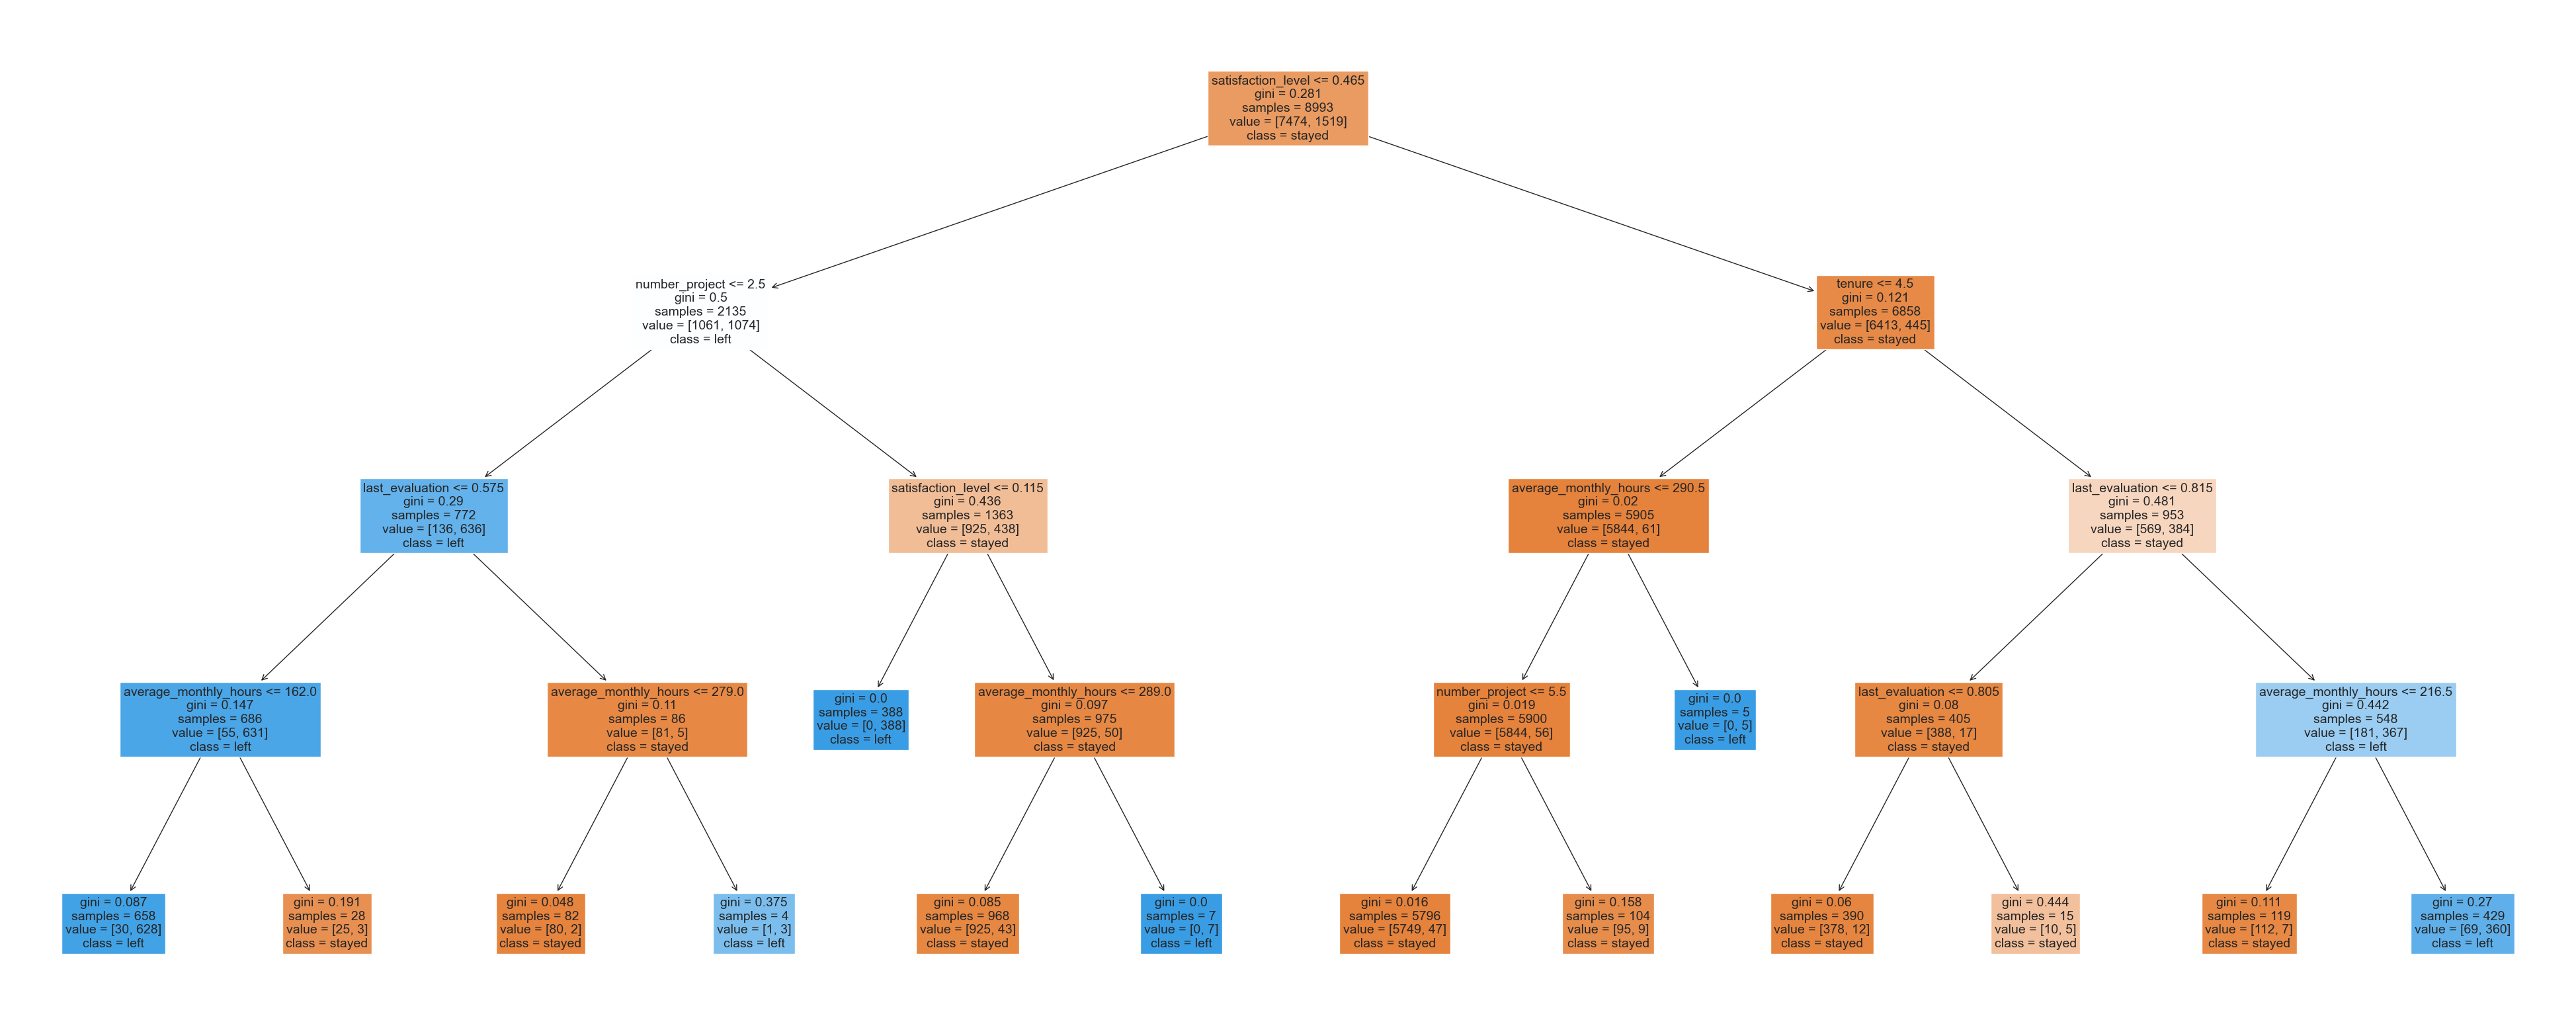

In [1004]:
# Analysons les résultats du modèle de l'arbre de décisition
plt.figure(figsize=(50,20))

plot_tree(clf.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns.tolist(), 
          class_names=['stayed', 'left'], filled=True);
plt.show()

In [1020]:
tree_importances = pd.DataFrame(clf.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree_importances = tree_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree_importances = tree_importances[tree_importances['gini_importance'] != 0]
tree_importances

gini_importance
satisfaction_level            0.534063
last_evaluation               0.142287
tenure                        0.120114
number_project                0.118770
average_monthly_hours         0.084767

<p>Visualisons les résultats</p>

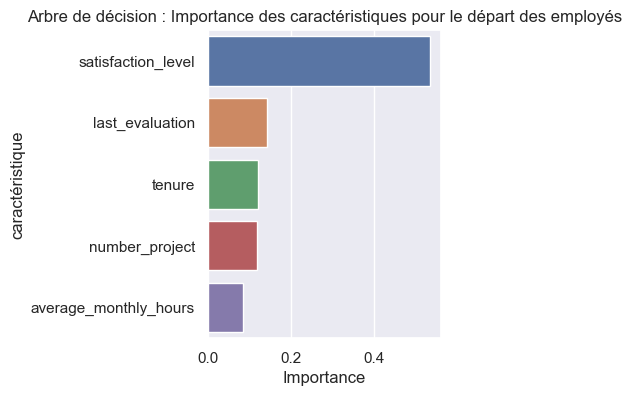

In [1015]:
sns.barplot(data=tree_importances, x="gini_importance", y=tree_importances.index, orient='h')
plt.title("Arbre de décision : Importance des caractéristiques pour le départ des employés", fontsize=12)
plt.ylabel("caractéristique")
plt.xlabel("Importance")
plt.show()

<p>Nous voyons que par le gini_importance, les variables les plus importantes ont été : 'satisfaction_level', 'last_evaluation', 'tenure', 'number_project' et  'average_monthly_hours'</p>

<h3>Importance des variables dans la forêt aléatoire</h3>

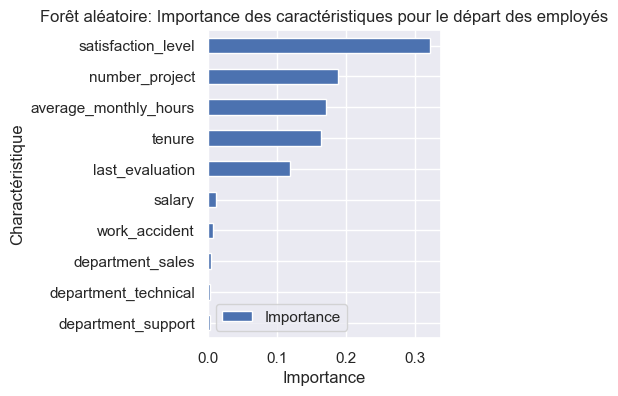

In [1026]:
# Indiquons 10 charactéristiques les plus importants dans la construction du modèle de fôret aléatoire 
feat_impt = rf_cv.best_estimator_.feature_importances_

ind = np.argpartition(rf_cv.best_estimator_.feature_importances_, -10)[-10:]
feat = X.columns[ind]

feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Forêt aléatoire: Importance des caractéristiques pour le départ des employés", fontsize=12)
ax1.set_ylabel("Charactéristique")
ax1.set_xlabel("Importance")

plt.show()

<p>Les résultats de l’analyse de l’importance des caractéristiques dans la construction du modèle de forêt aléatoire diffèrent légèrement des résultats du modèle de l’arbre de décision. Notamment, ce modèle accorde un peu moins d’importance à la dernière évaluation. En premier lieu se trouve le niveau de satisfaction, suivi par le nombre de projets, le temps moyen travaillé et l’ancienneté. Comme nous l’avons déjà indiqué, la variable ‘satisfaction_level’ sans spécification ultérieure a une faible force explicative. Par conséquent, nous pouvons conclure que dans cette entreprise, les facteurs les plus importants de départ des employés étaient la charge excessive de travail en termes de nombre d’heures travaillées ainsi que le nombre de projets sur lesquels les employés travaillaient. Un autre prédicteur important est l’ancienneté : nous avons observé qu’au début de leur carrière, les employés ont tendance à quitter leur poste. </p>

<h3>Résultats</h3>

<h3>Les modèles et l'importance des caractéristiques extraites des modèles confirment que les employés de l'entreprise sont surchargés de travail.</h3>
<h3>Pour retenir les employés, les recommandations suivantes pourraient être présentées aux parties prenantes :</h3>
<ul>
    <li>Limiter le nombre de projets sur lesquels les employés peuvent travailler.</li>
    <li>Envisager de promouvoir les employés qui sont dans l'entreprise depuis au moins quatre ans, ou mener une enquête plus approfondie pour comprendre pourquoi les employés ayant une ancienneté de quatre ans sont si insatisfaits.</li>
    <li>Récompenser les employés pour les heures supplémentaires travaillées, ou ne pas leur demander de travailler plus longtemps.</li>
    <li>Informer les employés sur les politiques de rémunération des heures supplémentaires de l'entreprise, s'ils ne les connaissent pas. Si les attentes concernant la charge de travail et les congés ne sont pas explicites, les rendre claires.</li>
    <li>Organiser des discussions à l'échelle de l'entreprise et au sein des équipes pour comprendre et améliorer la culture de travail de l'entreprise, à la fois globalement et dans des contextes spécifiques.</li>
    <li>Les scores d'évaluation élevés ne doivent pas être réservés aux employés qui travaillent plus de 200 heures par mois. Envisager une échelle proportionnelle pour récompenser les employés qui contribuent davantage ou fournissent plus d'efforts.</li>
</ul>